In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *

In [2]:
# Global variables and statistics
dataset = 'bm1'
benchmark_name = 'CNN in Keras on MNIST'
num_trials =30


In [3]:
# Read sequential optimization results
tpe_results = {}
run30_results = {}
run40_results = {}
opt_secs = 7200
s_path = "./{}/T{}S/".format(dataset, opt_secs)

run30_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(30)' + '.json')
run30_results['TPE (hybrid, ETR)'] = load_json(s_path + 'TPE-HLE-EI.HPO_runner.ETR-DecaTercet(30)' + '.json')
run30_results['TPE'] = load_json(s_path + 'TPE-EI.HPO_runner(30)' + '.json')
run40_results['S-Div(w/ TPE)'] = load_json(s_path + 'DIV-SEQ.p7div-etr.HPO_runner.ETR-DecaTercet(40)' + '.json')
run30_results['S-Div(w/ TPE)'] = run40_results['S-Div(w/ TPE)']

In [4]:
run10_results = {}
run10_results['Random (Sobol)'] = load_json(s_path + 'SOBOL-RANDOM.HPO_runner(10)' + '.json')
run10_results['Random (Sobol, ETR)'] = load_json(s_path + 'SOBOL-RANDOM.HPO_runner.ETR-DecaTercet(10)' + '.json')
run10_results['Random (HyperOpt)'] = load_json(s_path + 'TPE-RANDOM.HPO_runner(10)' + '.json')
run10_results['Random (HyperOpt, ETR)'] = load_json(s_path + 'TPE-RANDOM.HPO_runner.ETR-DecaTercet(10)' + '.json')
run10_results['TPE'] = run30_results['TPE']
run10_results['S-Div'] = run30_results['S-Div']
run10_results['S-Div(w/ TPE)'] = run30_results['S-Div(w/ TPE)']

In [5]:
max_accs = []
for i in range(10):
    max_acc = max(run10_results['Random (Sobol)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("Random (Sobol)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sr_bests = max_accs

Random (Sobol)
avg. 0.9909 (0.0011)
max 0.9929
[0.9912, 0.9894, 0.9908, 0.9929, 0.9902, 0.9904, 0.9903, 0.9905, 0.9928, 0.9903]


In [6]:
max_accs = []
for i in range(10):
    max_acc = max(run10_results['Random (Sobol, ETR)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("Random (Sobol, ETR)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sre_bests = max_accs

Random (Sobol, ETR)
avg. 0.9912 (0.0007)
max 0.9927
[0.9914, 0.9908, 0.9911, 0.9897, 0.9918, 0.9927, 0.9912, 0.9909, 0.9913, 0.9913]


In [7]:
max_accs = []
for i in range(10):
    max_acc = max(run10_results['Random (HyperOpt)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("Random (HyperOpt)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
hr_bests = max_accs

Random (HyperOpt)
avg. 0.9913 (0.0013)
max 0.9931
[0.9928, 0.9917, 0.9915, 0.9888, 0.9918, 0.9896, 0.9899, 0.9915, 0.9931, 0.992]


In [8]:
max_accs = []
for i in range(10):
    max_acc = max(run10_results['Random (HyperOpt, ETR)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("Random (HyperOpt, ETR)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
hre_bests = max_accs

Random (HyperOpt, ETR)
avg. 0.9911 (0.0013)
max 0.9924
[0.9893, 0.9921, 0.9894, 0.9919, 0.9917, 0.9916, 0.9888, 0.9921, 0.9924, 0.9914]


In [9]:
bohb_results  = {}
bohb_results['BOHB'] = load_json('./bm1/bohb_max_budget_9_result' + '.json')
run30_results['BOHB'] = bohb_results['BOHB']

In [10]:
max_accs = []
for i in range(30):
    max_acc = max(run30_results['S-Div'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sdiv_bests = max_accs

S-Div
avg. 0.9937 (0.0003)
max 0.9943
[0.9938, 0.9938, 0.9936, 0.9937, 0.9933, 0.9934, 0.9932, 0.9938, 0.9938, 0.9943, 0.9937, 0.9934, 0.9943, 0.9943, 0.9936, 0.9934, 0.9939, 0.9938, 0.9943, 0.9933, 0.9936, 0.9938, 0.9936, 0.9936, 0.9937, 0.9939, 0.993, 0.9939, 0.9934, 0.9936]


In [11]:
max_accs = []
for i in range(40):
    max_acc = max(run40_results['S-Div(w/ TPE)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div(w/ TPE)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sdiv7_bests = max_accs

S-Div(w/ TPE)
avg. 0.9938 (0.0004)
max 0.995
[0.9939, 0.9935, 0.9933, 0.994, 0.9933, 0.9933, 0.995, 0.9938, 0.994, 0.9935, 0.9941, 0.9934, 0.9939, 0.9939, 0.9938, 0.9941, 0.9934, 0.9935, 0.9936, 0.9939, 0.9946, 0.9933, 0.9941, 0.9936, 0.9938, 0.9942, 0.9941, 0.9947, 0.9937, 0.9942, 0.9939, 0.9934, 0.9934, 0.9942, 0.9934, 0.9937, 0.9937, 0.9939, 0.9936, 0.9934]


In [12]:
max_accs = []
for i in range(30):
    max_acc = max(run30_results['TPE (hybrid, ETR)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("TPE (hybrid, ETR)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
tpe_he_bests = max_accs

TPE (hybrid, ETR)
avg. 0.9932 (0.0005)
max 0.9941
[0.9932, 0.9937, 0.9935, 0.9932, 0.9932, 0.9928, 0.9928, 0.9929, 0.9927, 0.9941, 0.9933, 0.9941, 0.9936, 0.9931, 0.9936, 0.9927, 0.9928, 0.9934, 0.9926, 0.9938, 0.9937, 0.9932, 0.9931, 0.9931, 0.992, 0.993, 0.9934, 0.9935, 0.9934, 0.9935]


In [13]:
max_accs = []
for i in range(30):
    max_acc = max(run30_results['TPE'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("TPE\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
tpe_bests = max_accs

TPE
avg. 0.9930 (0.0005)
max 0.994
[0.9935, 0.9923, 0.993, 0.9931, 0.9927, 0.993, 0.9925, 0.9926, 0.9934, 0.9917, 0.9931, 0.993, 0.9931, 0.9934, 0.993, 0.9935, 0.9934, 0.9924, 0.9928, 0.9928, 0.9934, 0.9927, 0.9935, 0.9931, 0.9935, 0.994, 0.9933, 0.9925, 0.9935, 0.9933]


In [14]:
from scipy.stats import ttest_ind
print("S-Div vs. TPE p-value: {:.10f}".format(ttest_ind(sdiv7_bests, tpe_bests)[1]))

S-Div vs. TPE p-value: 0.0000000004


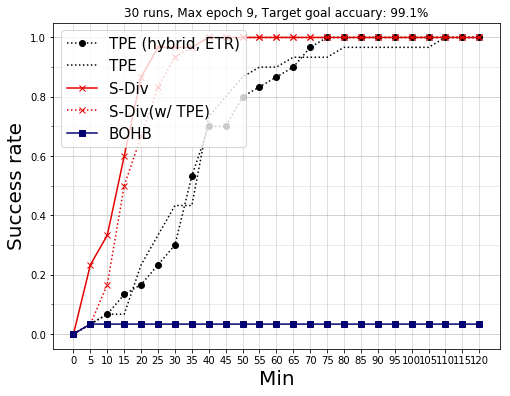

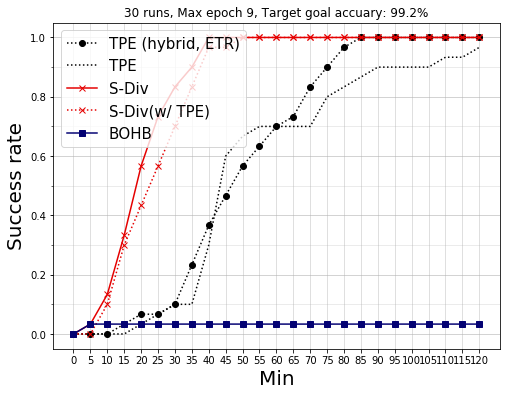

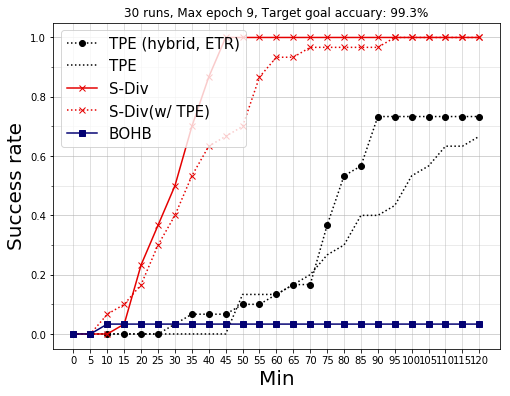

In [15]:
for ta in [0.991, 0.992, 0.993]:
    draw_success_rate_fig(run30_results, ta, 120 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=30,
                                              div=[ 'S-Div', 'S-Div(w/ TPE)', 'BOHB'], indi=['TPE (hybrid, ETR)', 'TPE'], legend={'loc': 2}, 
                                              title='30 runs, Max epoch 9, Target goal accuary: {}%'.format(ta*100),
                                                 width=8, height=6)

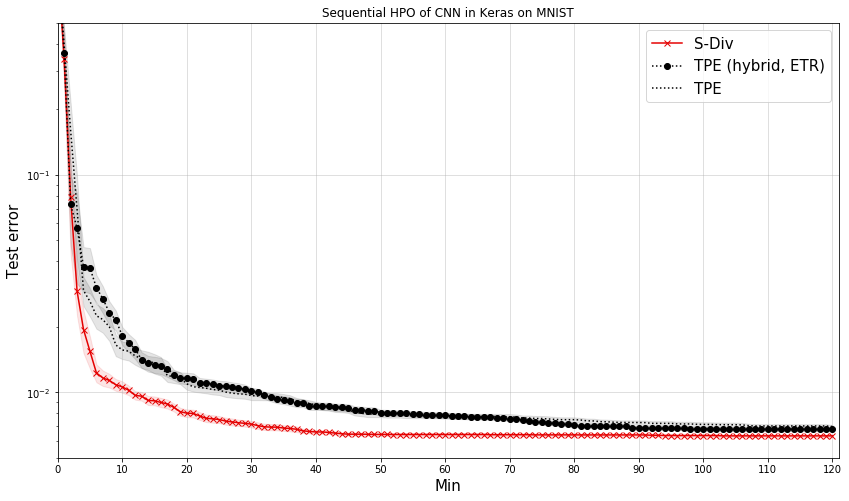

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [16]:
draw_best_error_curve(run30_results, ["S-Div"] + ['TPE (hybrid, ETR)', 'TPE'], 30, ylim=(.005, .5), xlim=(0, 120+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

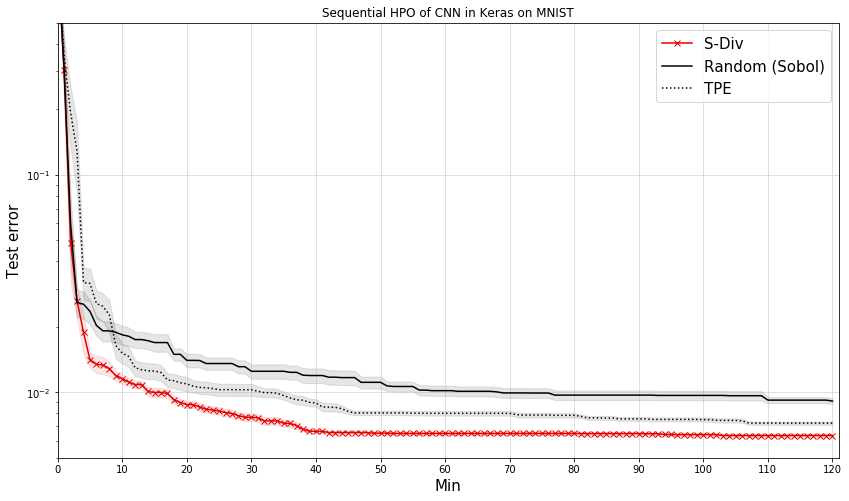

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [17]:
draw_best_error_curve(run10_results, ["S-Div"] + ['Random (Sobol)', 'TPE'], 10, ylim=(.005, .5), xlim=(0, 120+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [46]:
e27_results = {}
opt_secs = 18000
s_path = "./{}/T{}S/".format(dataset, opt_secs)
e27_results['S-Div (w/TPE)'] = load_json(s_path + 'DIV-SEQ.p7div-etr.HPO_runner.ETR-DecaTercet(30)' + '.json')
e27_results['Random'] = load_json(s_path + 'SOBOL-RANDOM.HPO_runner(30)' + '.json')
#e27_results['S-Div (obsolete)'] =  load_json(s_path + 'DIV-SEQ.hybrid-deca.(21).obsolete' + '.json')

max_accs = []
for i in range(21):
    max_acc = max(e27_results['S-Div (obsolete)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div(obsolete)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

In [48]:
max_accs = []
for i in range(30):
    max_acc = max(e27_results['Random'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("Random\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

Random
avg. 0.9934 (0.0009)
max 0.9953
[0.9933, 0.9934, 0.9953, 0.9928, 0.9928, 0.9936, 0.9941, 0.993, 0.9934, 0.9933, 0.9943, 0.994, 0.9915, 0.9932, 0.9923, 0.9922, 0.9938, 0.9919, 0.993, 0.9942, 0.9945, 0.9945, 0.9932, 0.9933, 0.9946, 0.9931, 0.994, 0.9931, 0.9911, 0.9943]


In [47]:
max_accs = []
for i in range(30):
    max_acc = max(e27_results['S-Div (w/TPE)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div (w/TPE)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

S-Div (w/TPE)
avg. 0.9953 (0.0003)
max 0.9958
[0.9953, 0.9954, 0.9954, 0.9956, 0.9954, 0.9957, 0.9956, 0.9954, 0.9953, 0.9949, 0.9953, 0.9951, 0.9958, 0.9958, 0.9958, 0.9953, 0.9954, 0.9957, 0.9946, 0.9949, 0.9954, 0.9951, 0.9952, 0.9952, 0.9953, 0.9954, 0.9948, 0.995, 0.9955, 0.9953]


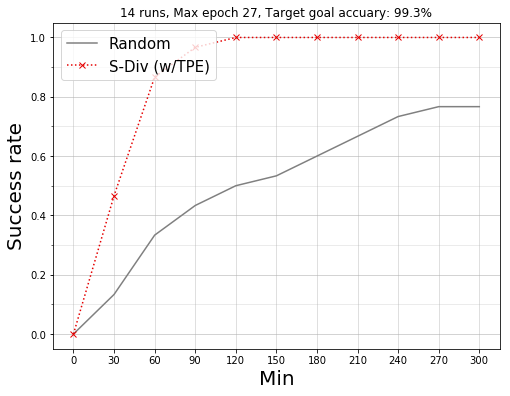

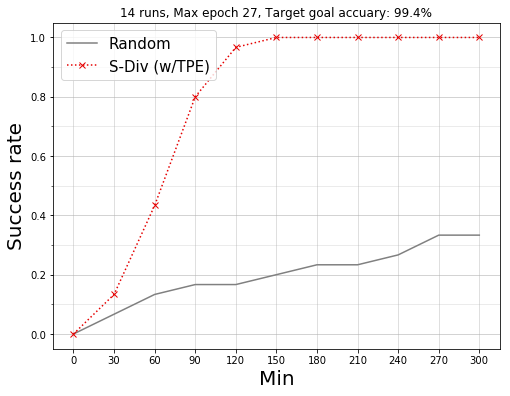

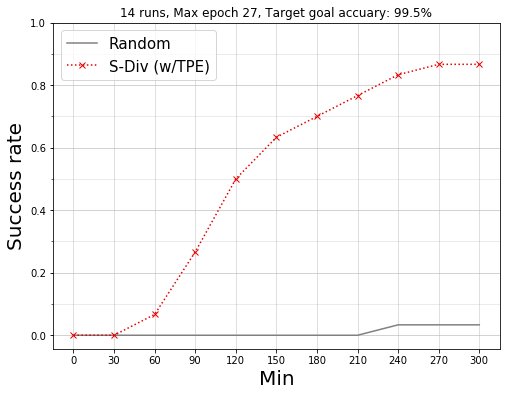

In [49]:
runs = 30
rand = [ 'Random']
divs = [ 'S-Div (w/TPE)'] # [ 'S-Div (w/TPE)']
for ta in [0.993, 0.994, 0.995]:
    draw_success_rate_fig(e27_results, ta, 5 * 60 +1, 
                                              x_unit='Min', step_size=30,
                                              num_runs=runs,
                                              indi= rand,
                                              div=divs, legend={'loc': 2}, 
                                              title='14 runs, Max epoch 27, Target goal accuary: {}%'.format(ta*100.0),
                                                 width=8, height=6)

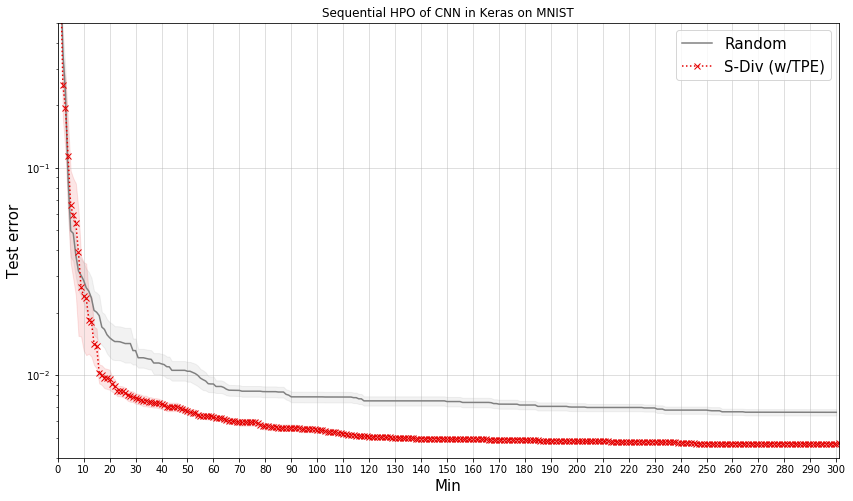

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [51]:
draw_best_error_curve(e27_results, 
                      rand+divs, 
                      runs, 
                      ylim=(.004, .5), xlim=(0, 60*5+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

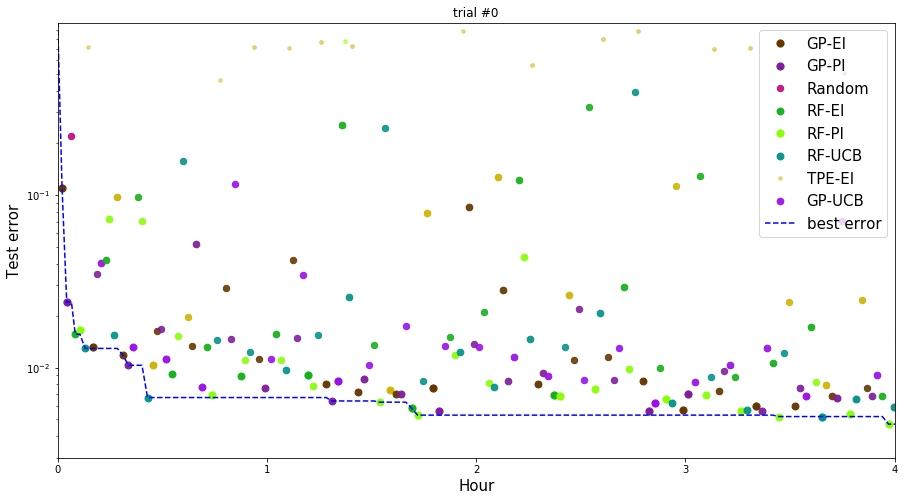

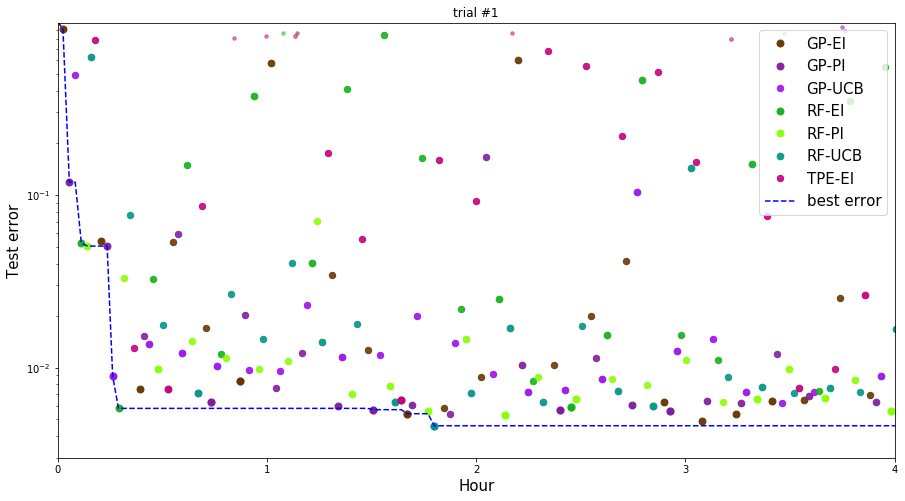

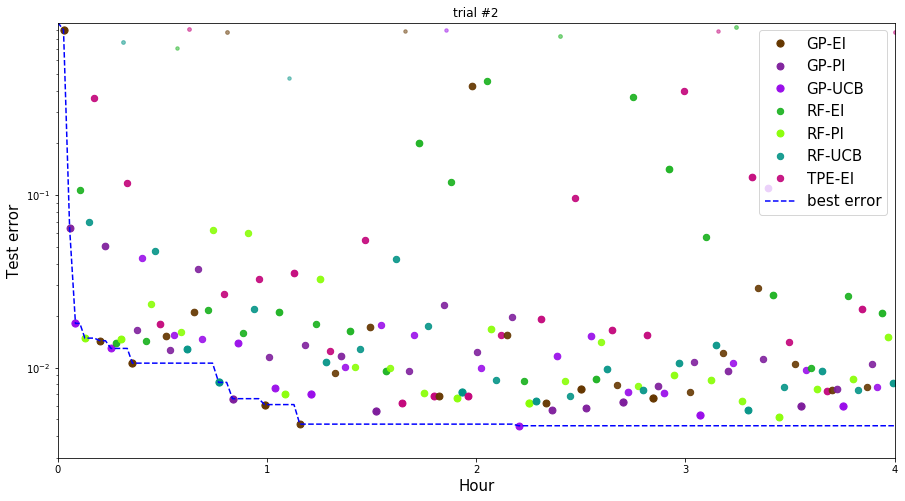

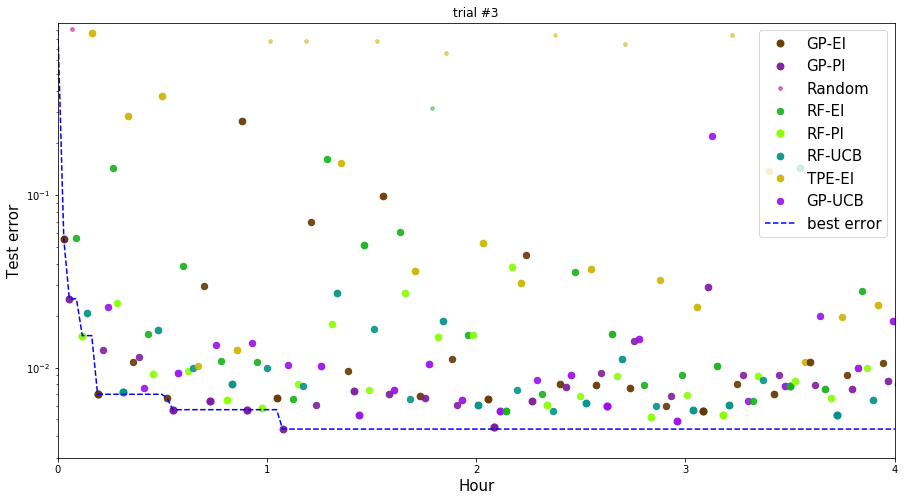

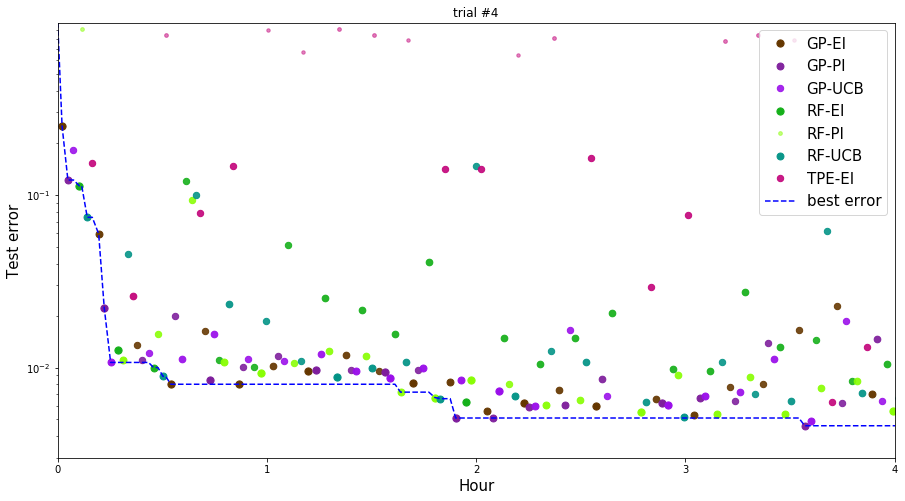

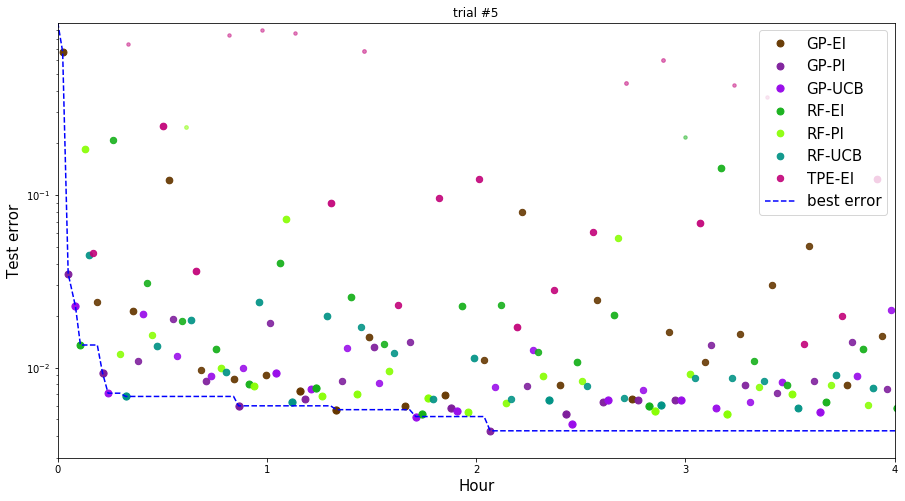

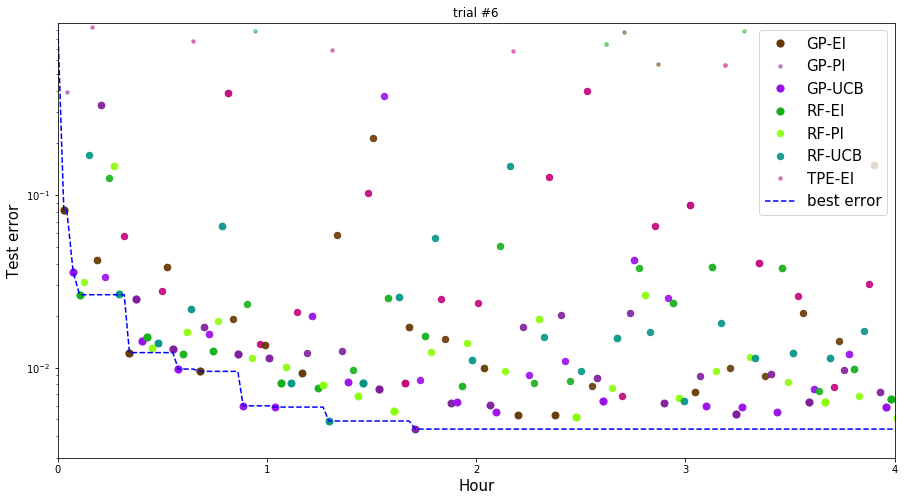

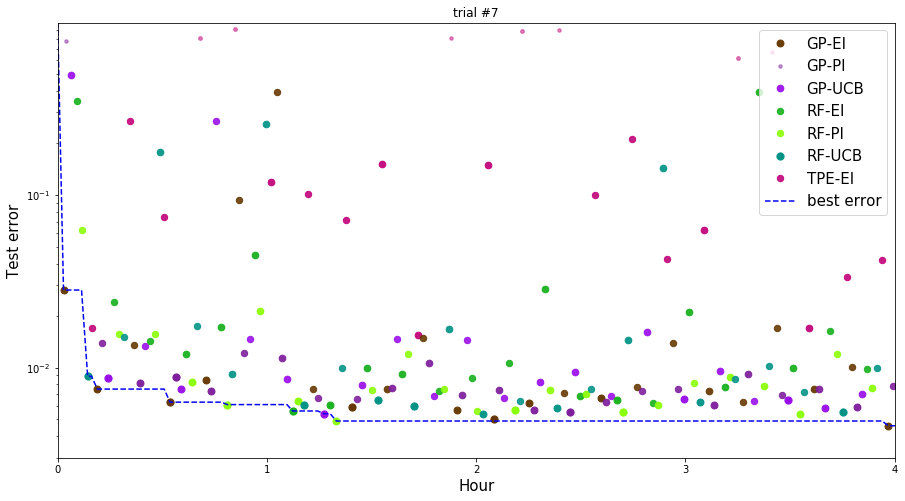

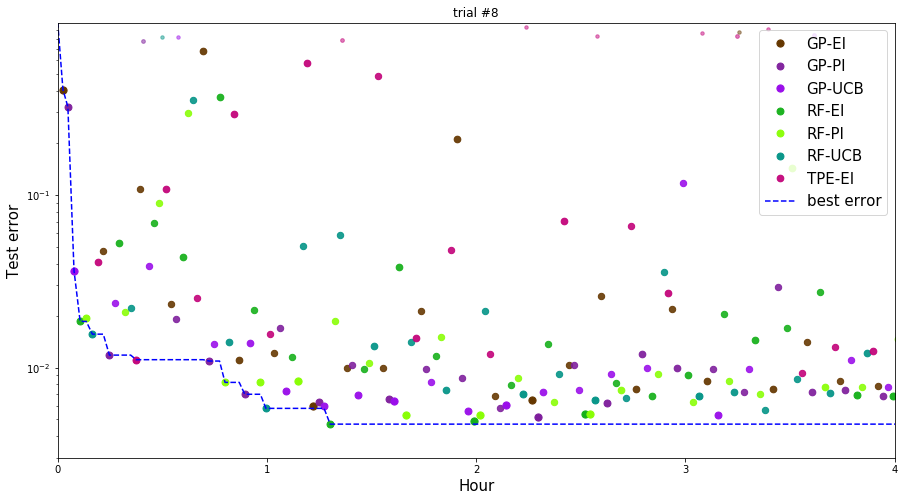

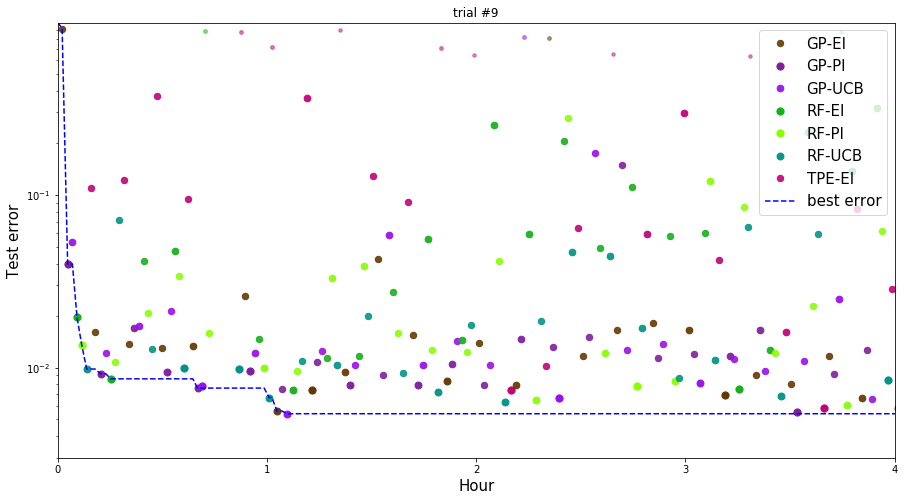

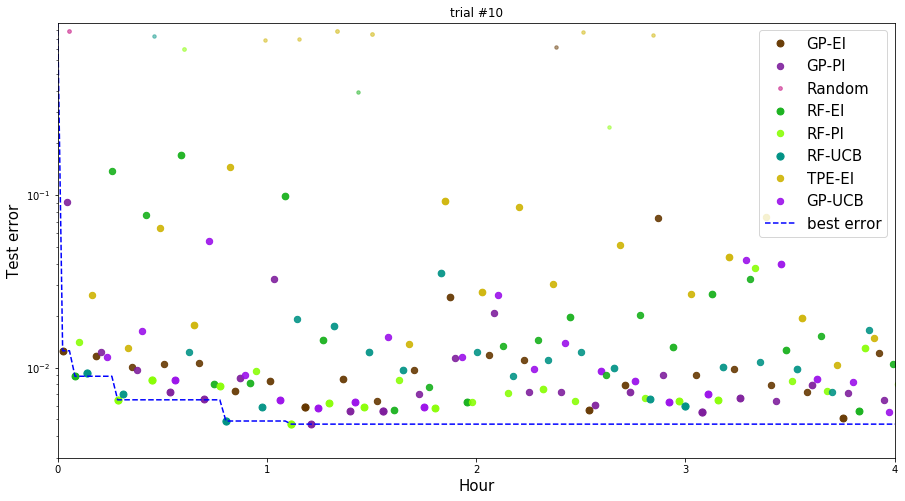

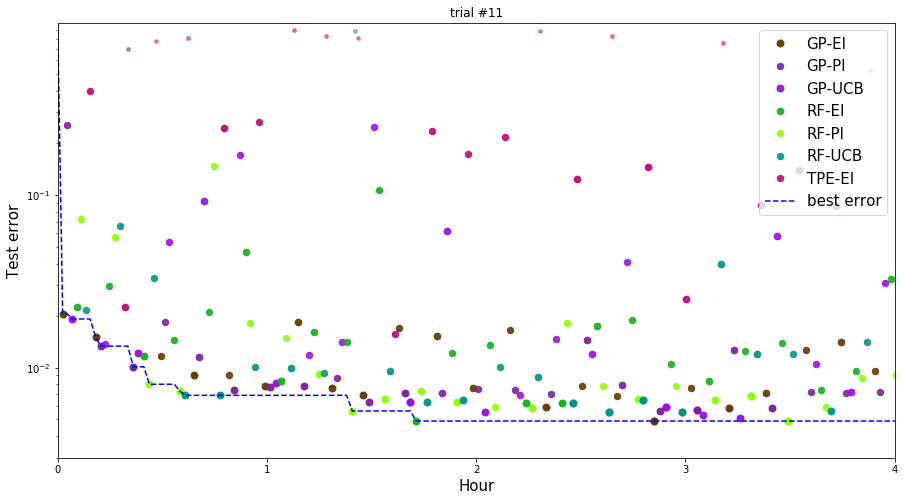

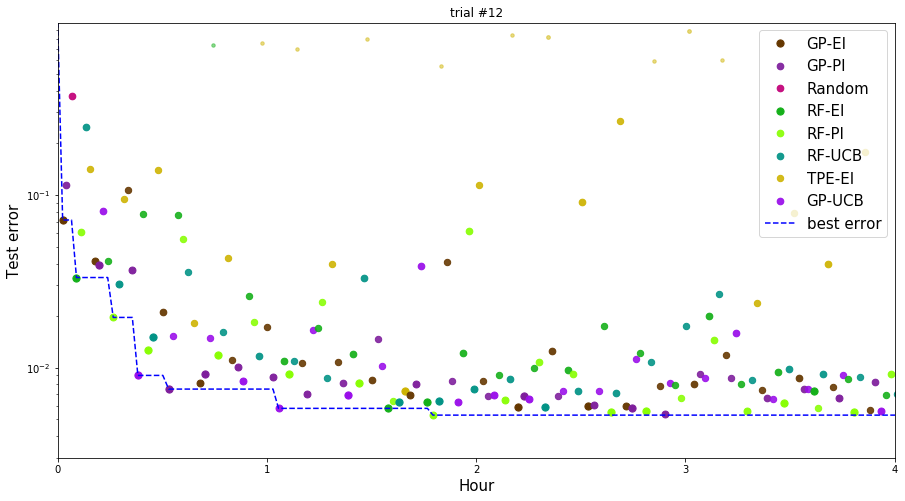

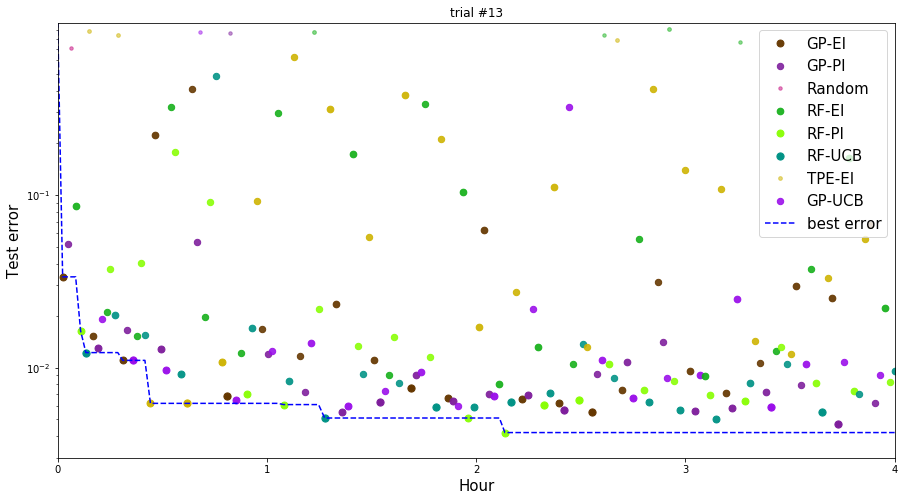

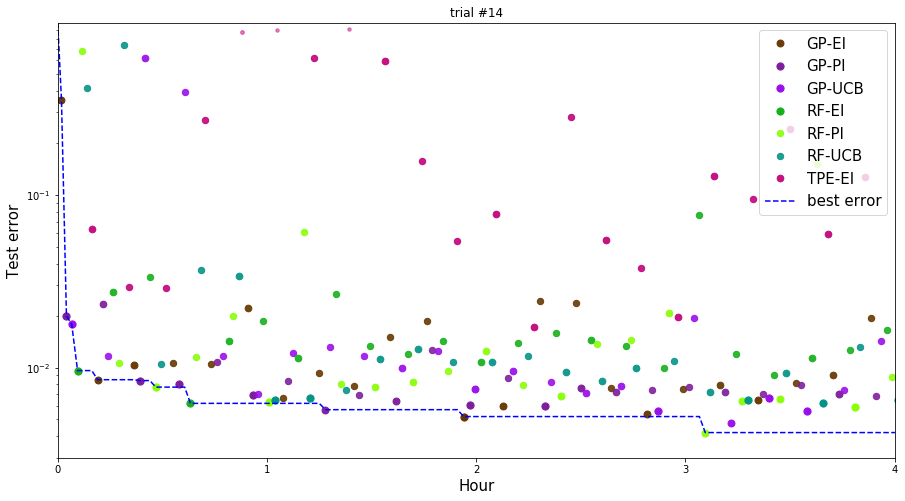

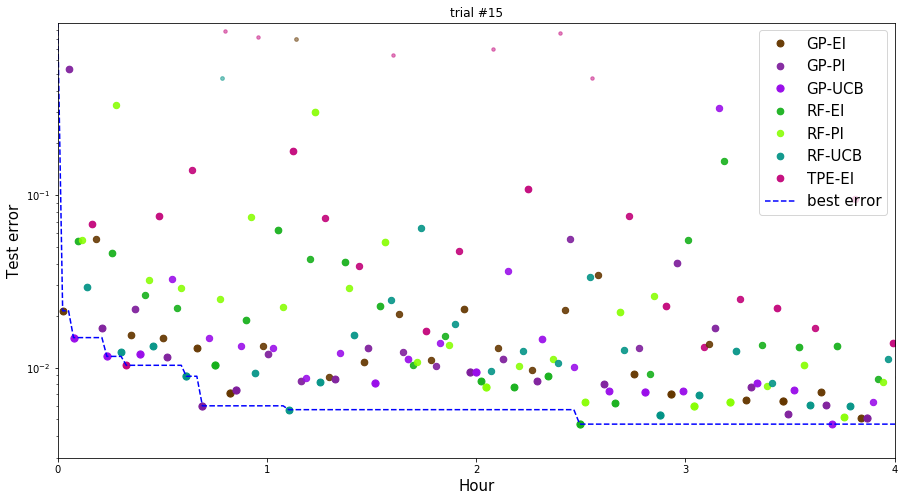

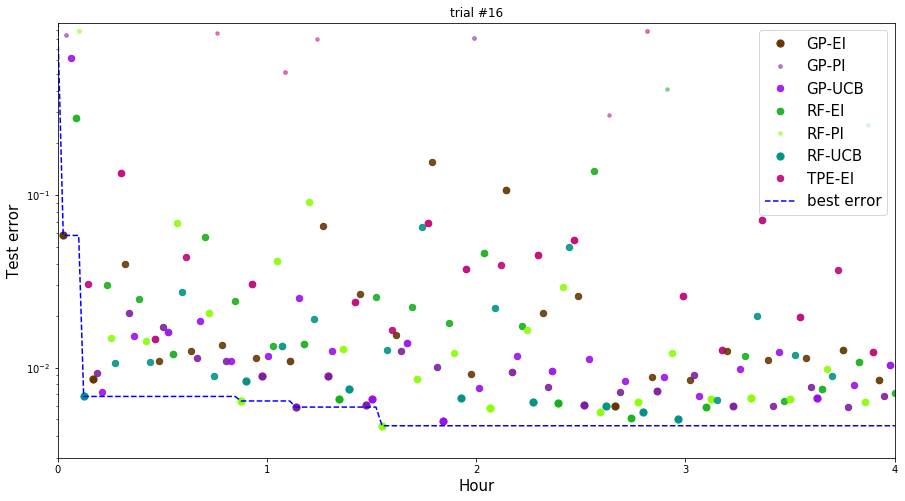

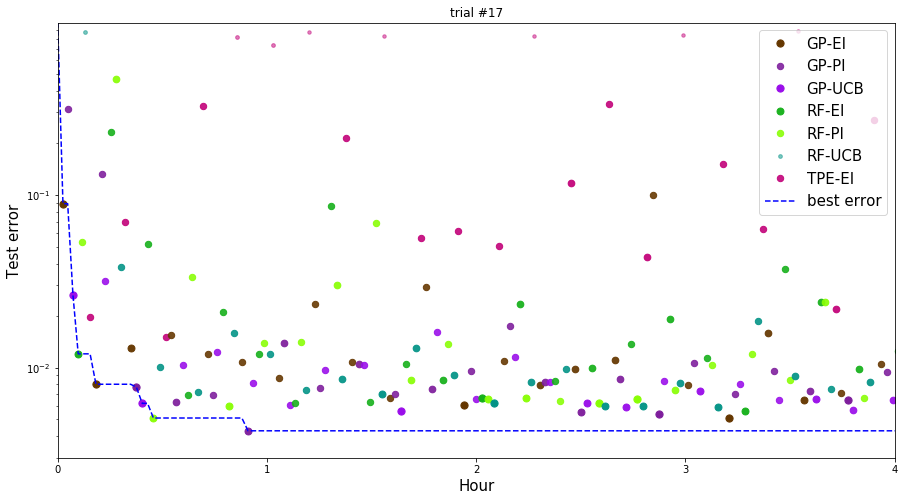

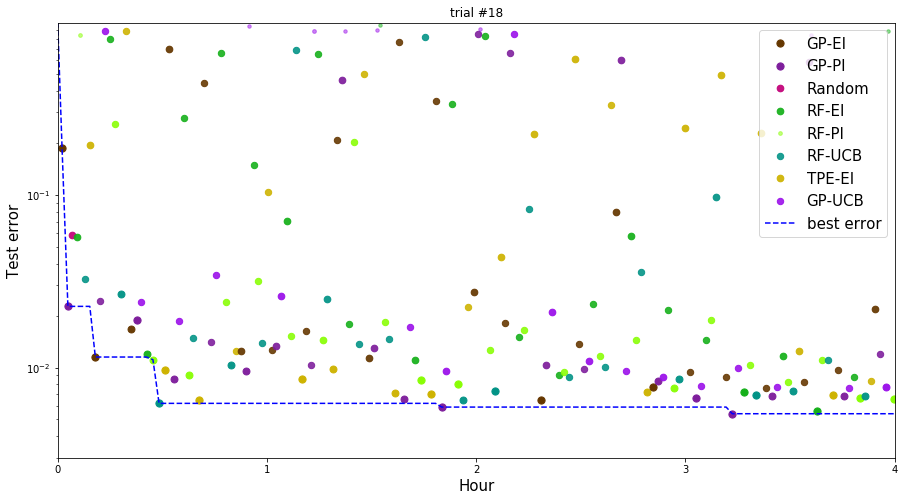

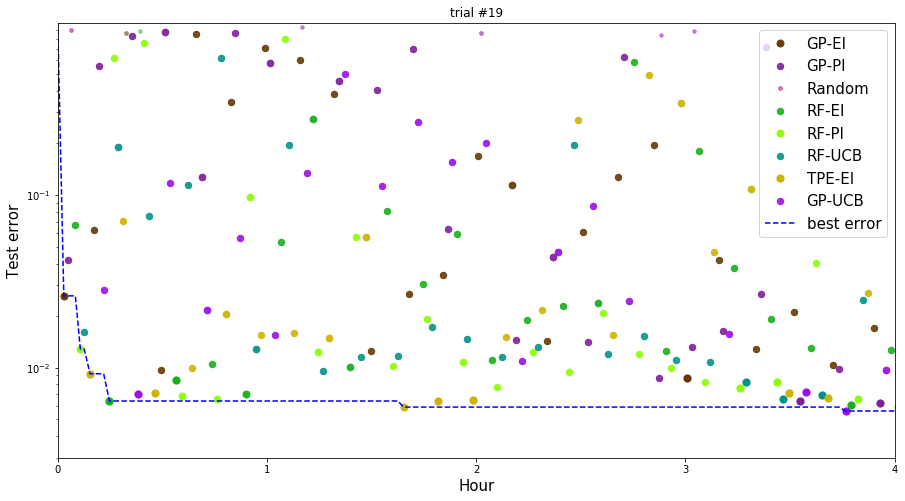

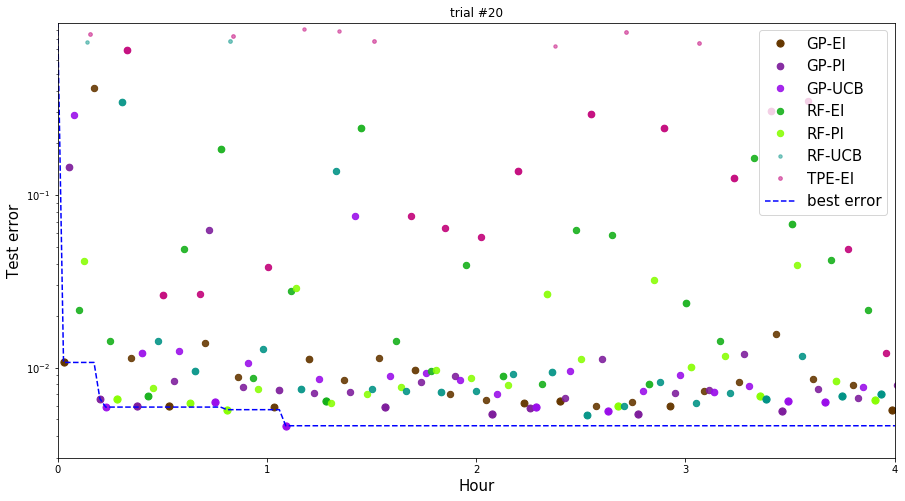

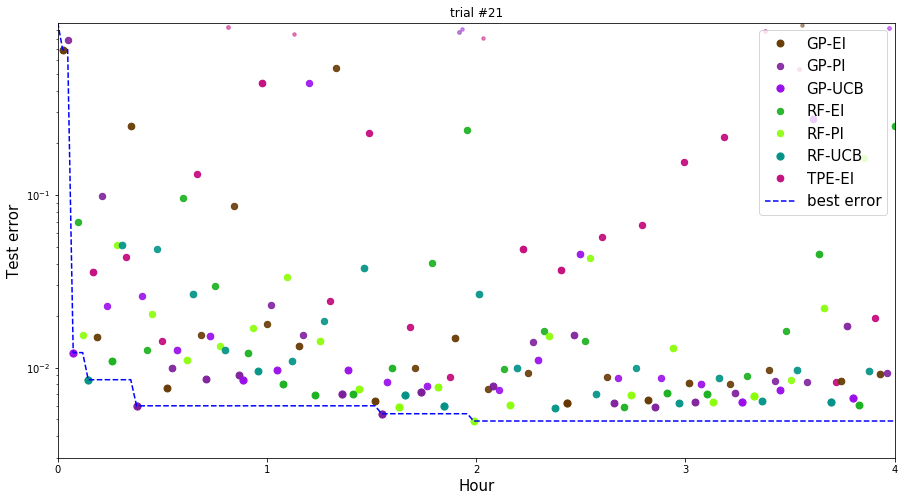

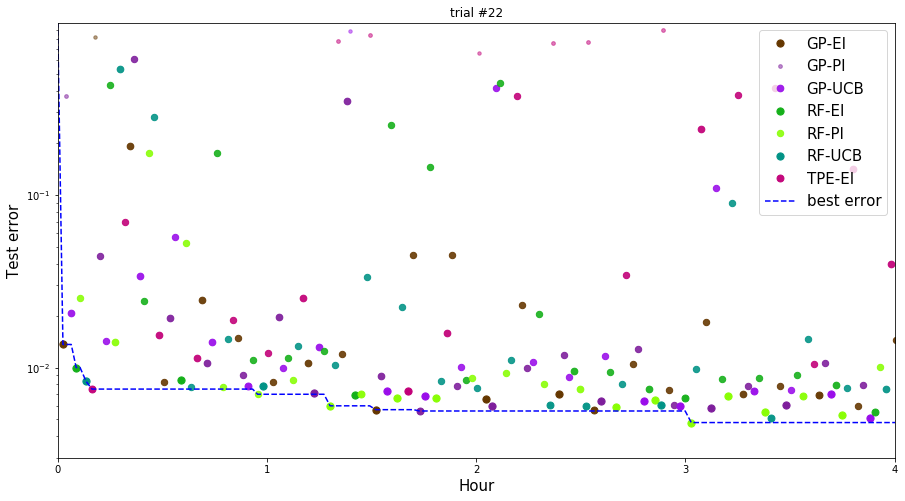

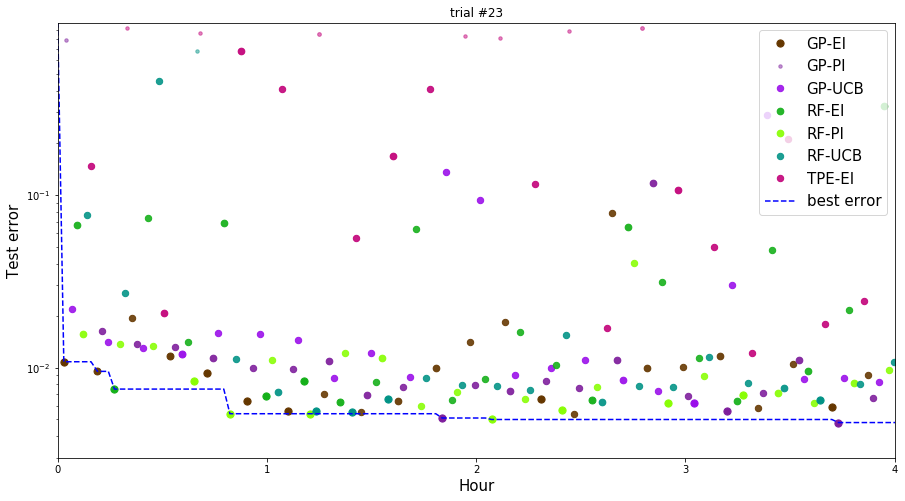

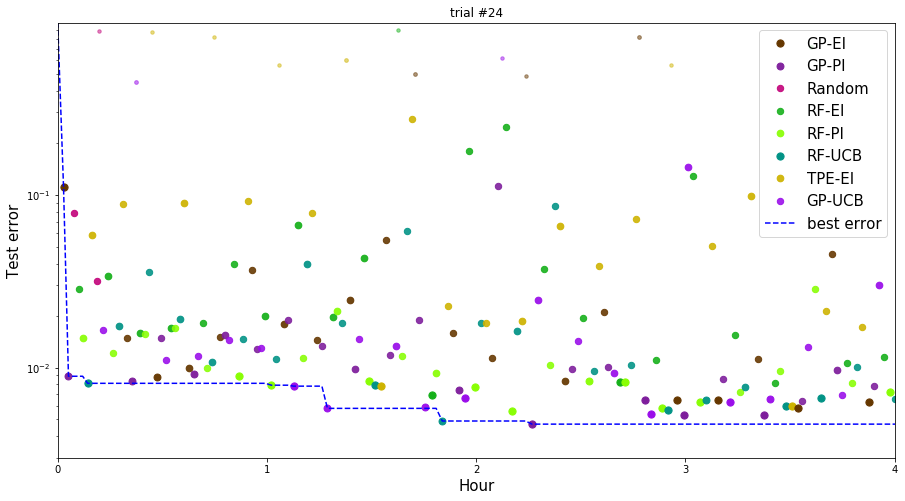

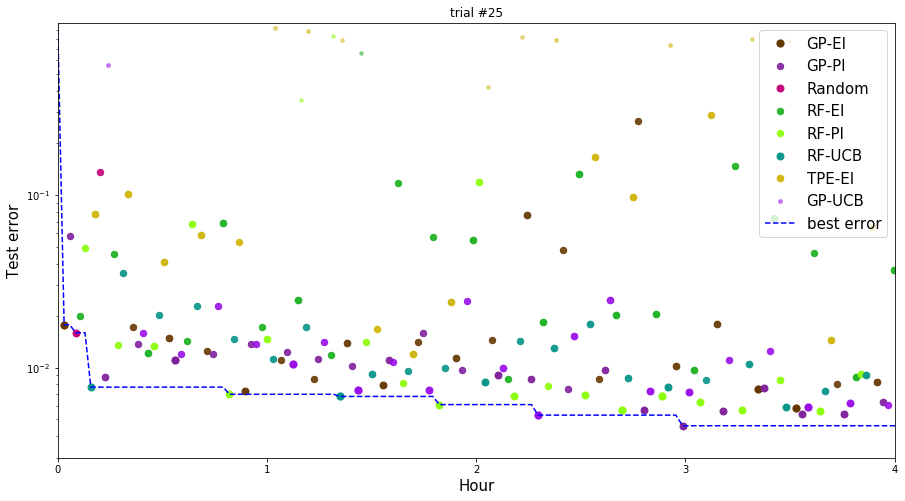

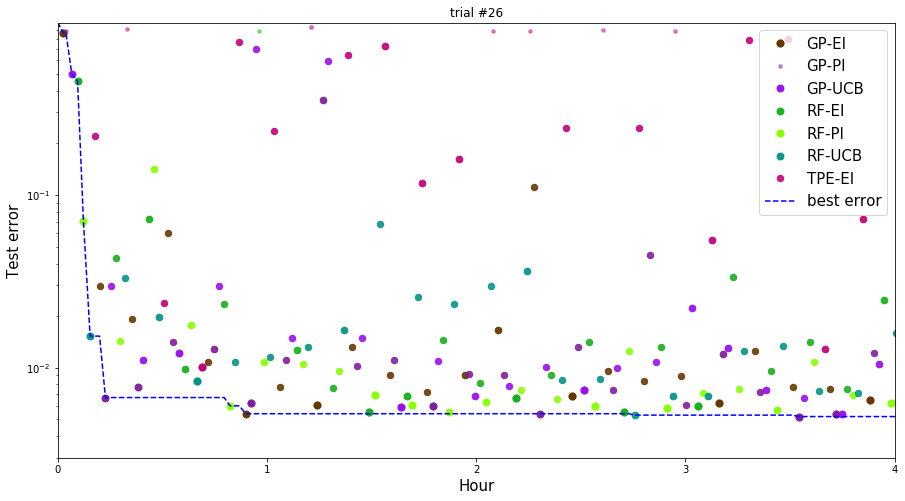

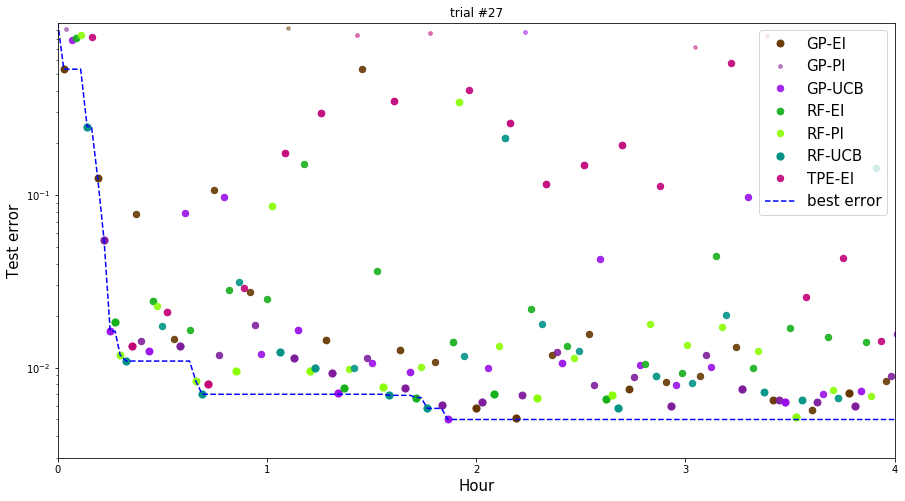

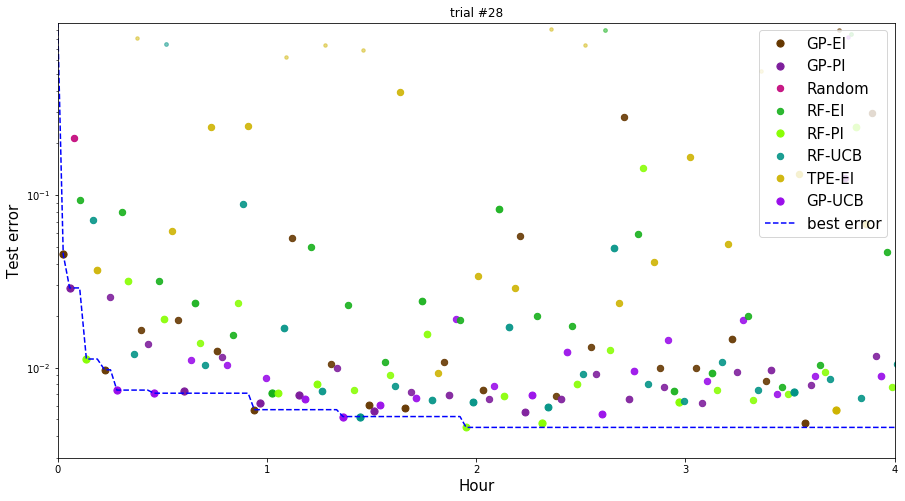

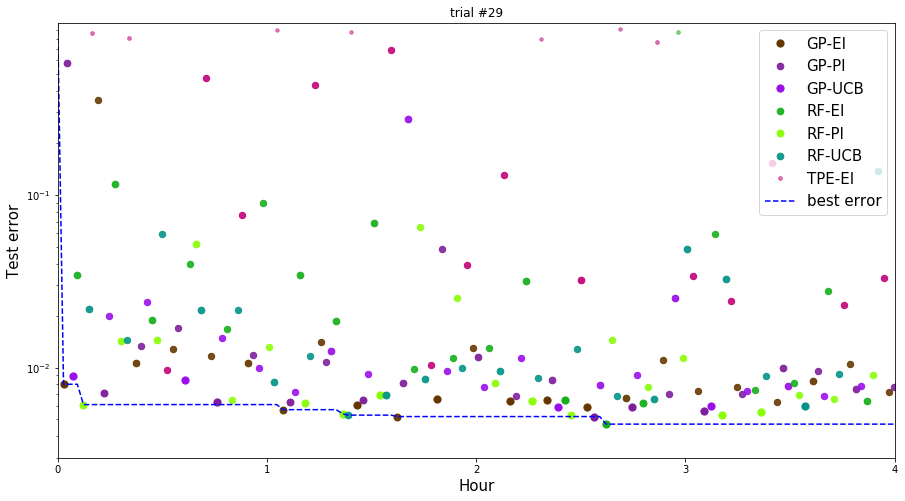

In [24]:
for i in range(30):
    draw_trials_curve(e27_results, 'S-Div (w/TPE)', i, ylim=(.003, .99), xlim=(0, 4), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

In [58]:
ep81_results = {}
opt_secs = 36000
s_path = "./{}/T{}S/".format(dataset, opt_secs)


ep81_results['S-Div (obsolete)'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(18).obsolete' + '.json')

max_accs = []
for i in range(18):
    max_acc = max(ep81_results['S-Div (obsolete)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div(obsolete)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

for ta in [0.994, 0.995, 0.996]:
    draw_success_rate_fig(ep81_results, ta, 10 , 
                                              x_unit='Hour', step_size=1,
                                              num_runs=18,
                                              div=[ 'S-Div (obsolete)'], legend={'loc': 2}, title='10 runs, Max epoch 81, Target goal accuary: {:.2f}%'.format(ta*100.0),
                                                 width=8, height=6)

draw_best_error_curve(ep81_results, ["S-Div (obsolete)"], 10, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [68]:
cfg = 'S-Div (w/ TPE)'
ep81_results[cfg] = load_json(s_path + 'DIV-SEQ.p7div-etr.HPO_runner.ETR-DecaTercet(10)' + '.json')

nt = 10
max_accs = []
for i in range(nt):
    max_acc = max(ep81_results[cfg][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("{}\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(cfg, np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

S-Div (w/ TPE)
avg. 0.9958 (0.0003)
max 0.9962
[0.9962, 0.9953, 0.9958, 0.9955, 0.9958, 0.9958, 0.9956, 0.9957, 0.9961, 0.9959]


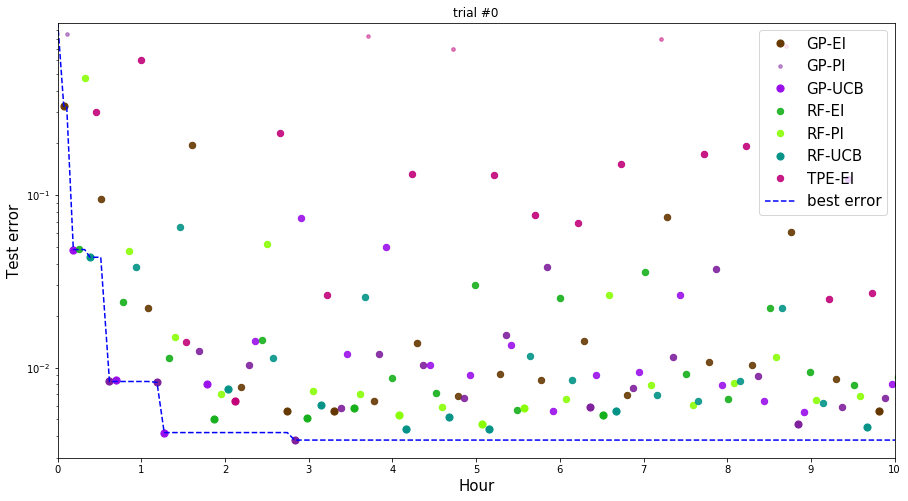

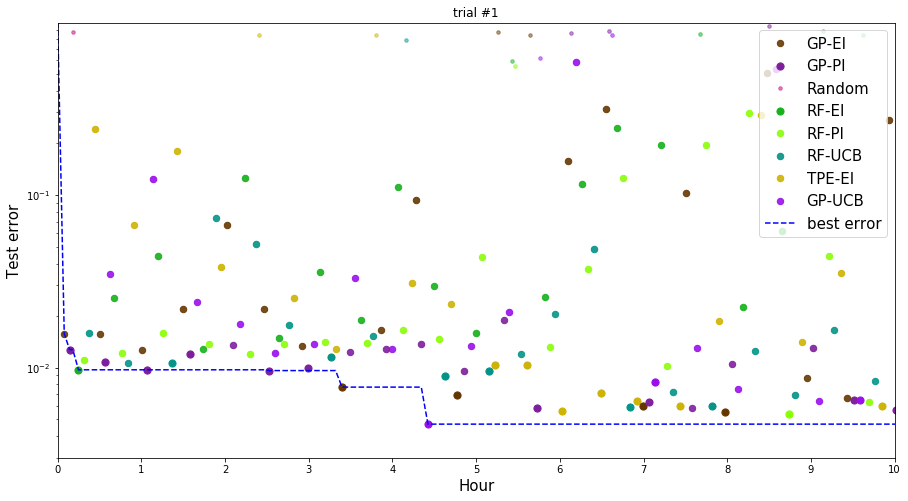

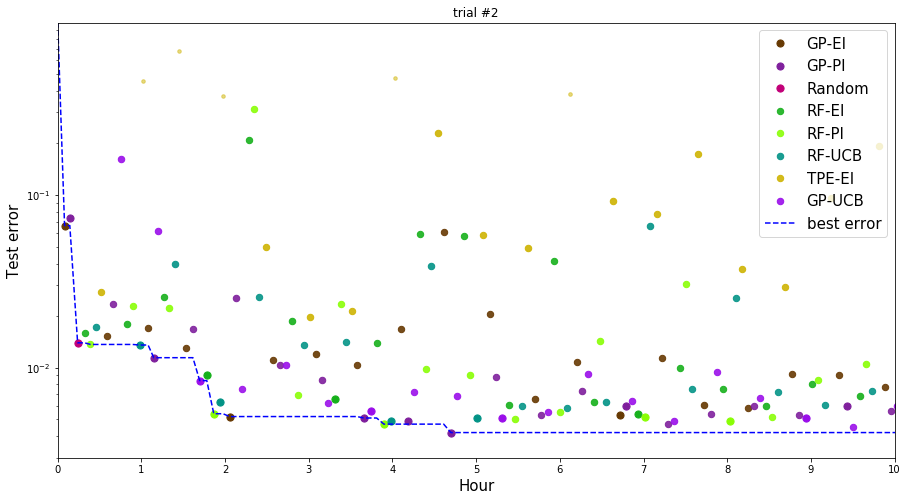

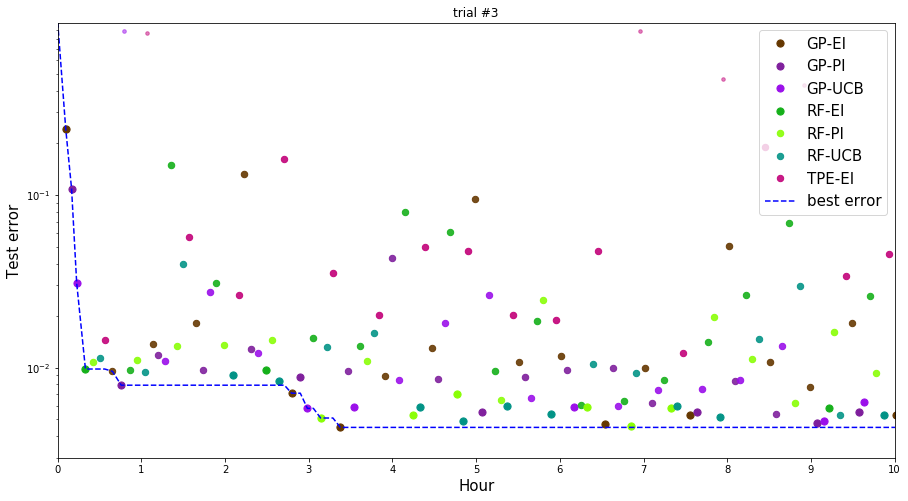

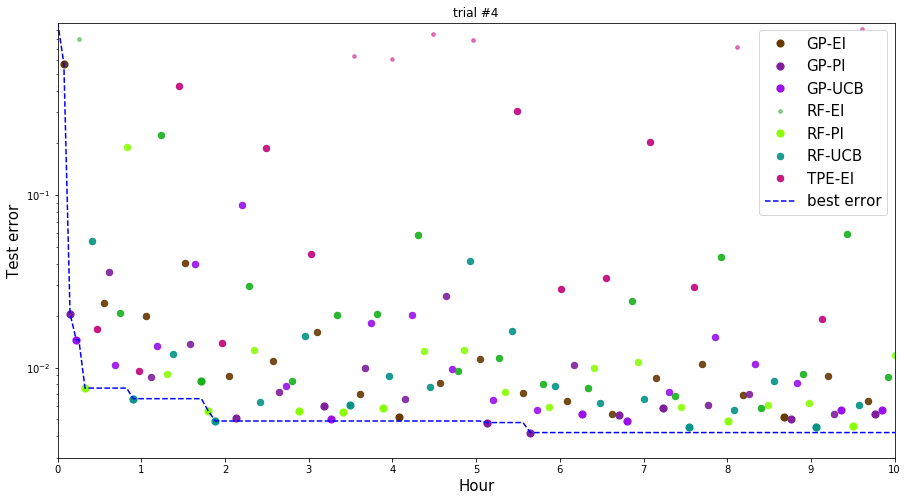

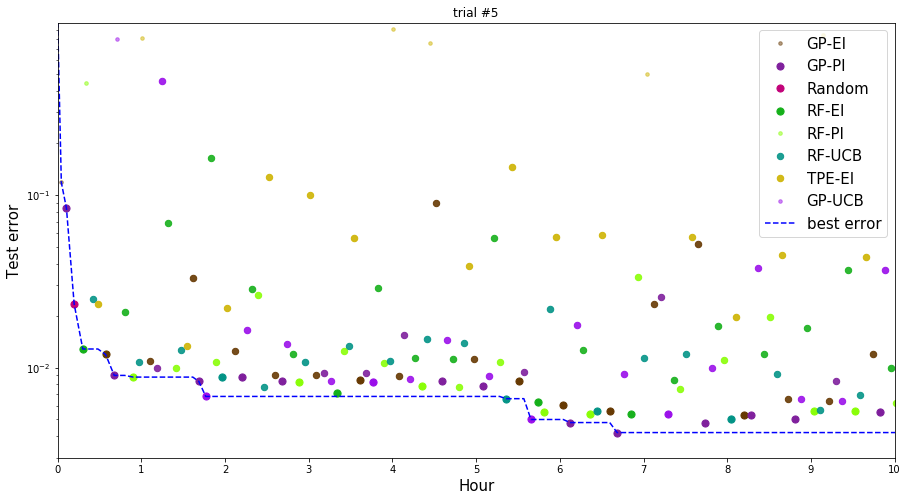

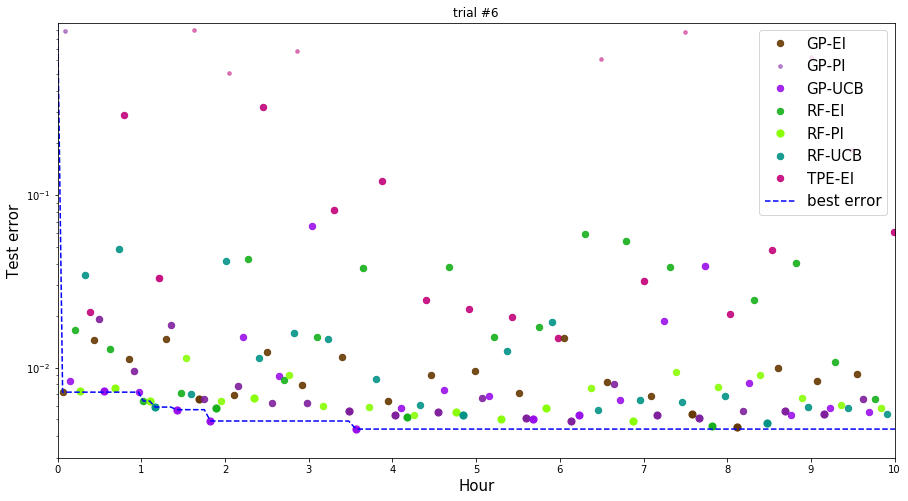

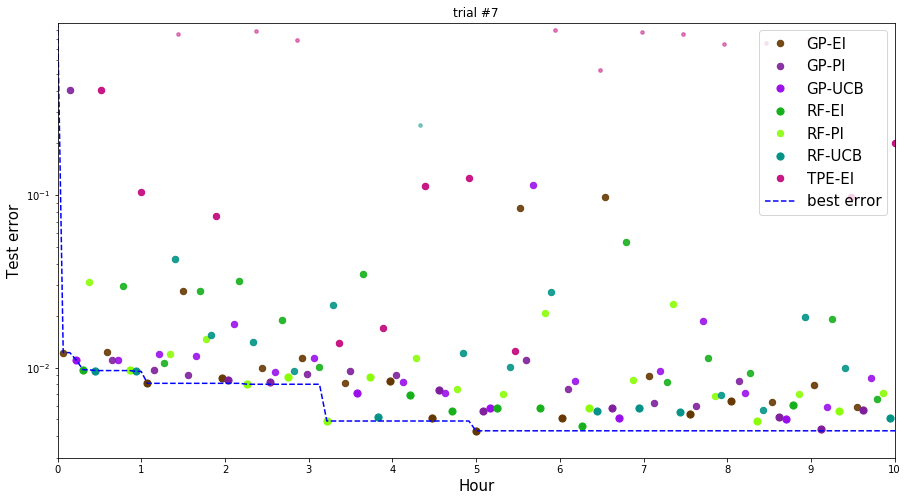

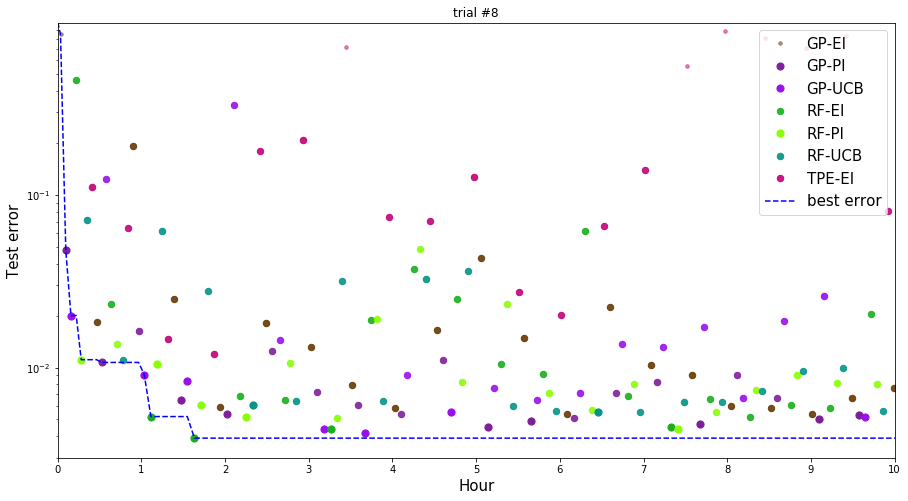

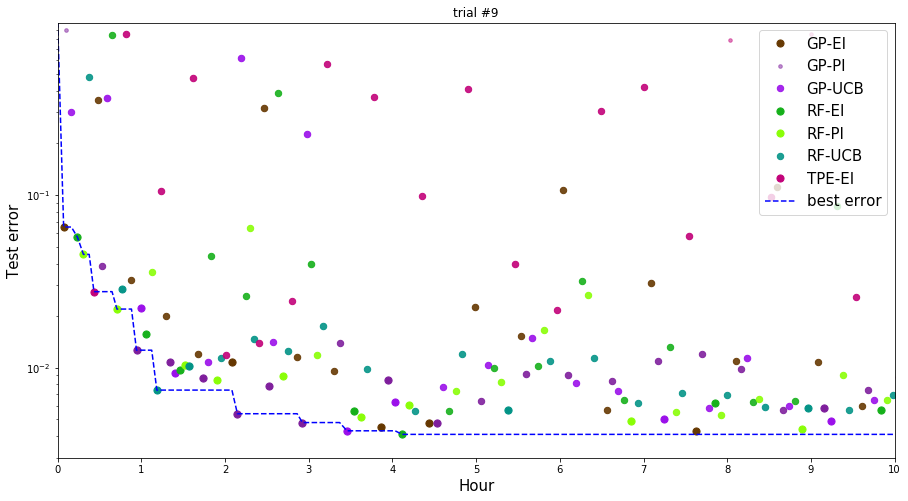

In [30]:
for i in range(nt):
    draw_trials_curve(ep81_results, cfg, i, ylim=(.003, .99), xlim=(0, 10), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

draw_best_error_curve(ep81_results, [cfg], nt, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}, max epoch: 81".format(benchmark_name))

In [69]:
cfg = 'Random'
ep81_results[cfg] = load_json(s_path + 'SOBOL-RANDOM.HPO_runner(10)' + '.json')

max_accs = []
for i in range(nt):
    max_acc = max(ep81_results[cfg][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("{}\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(cfg, np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

Random
avg. 0.9940 (0.0011)
max 0.9955
[0.9955, 0.9924, 0.9948, 0.994, 0.9942, 0.9946, 0.9954, 0.9944, 0.9925, 0.9926]


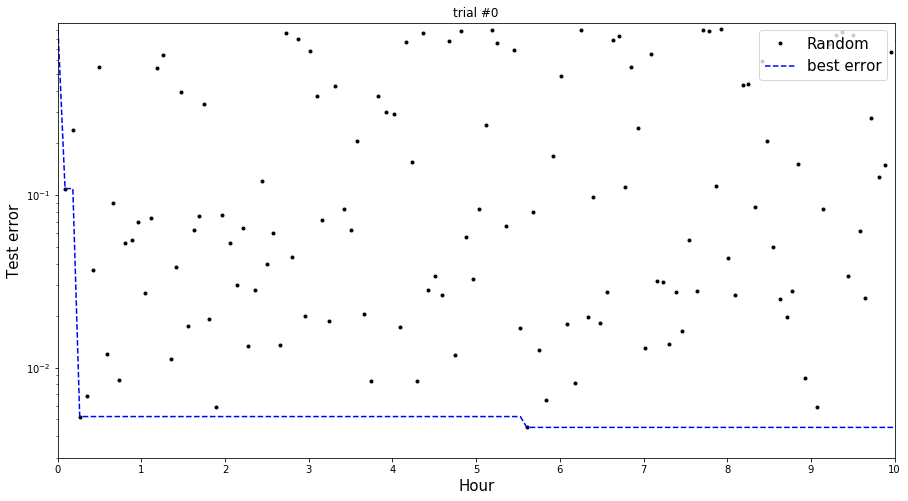

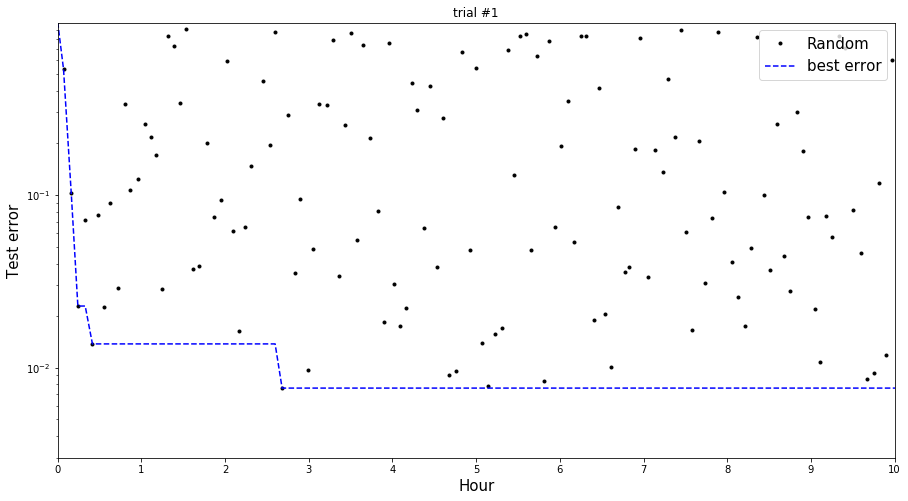

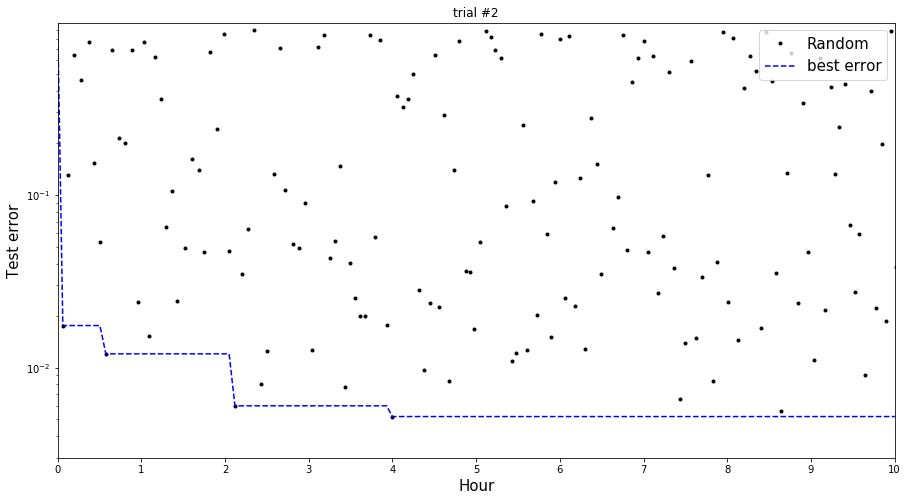

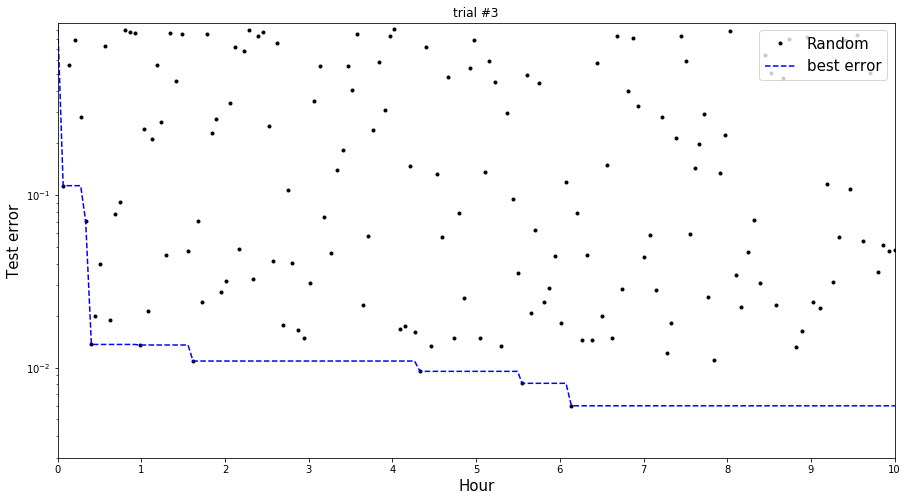

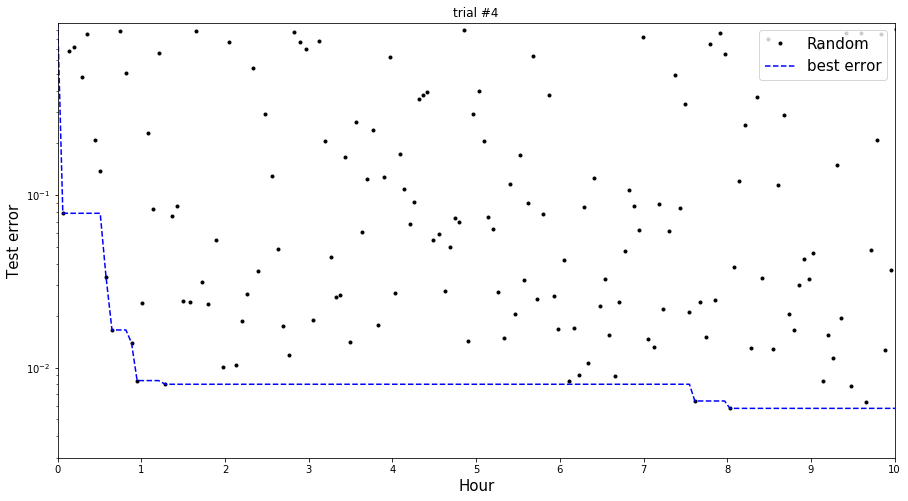

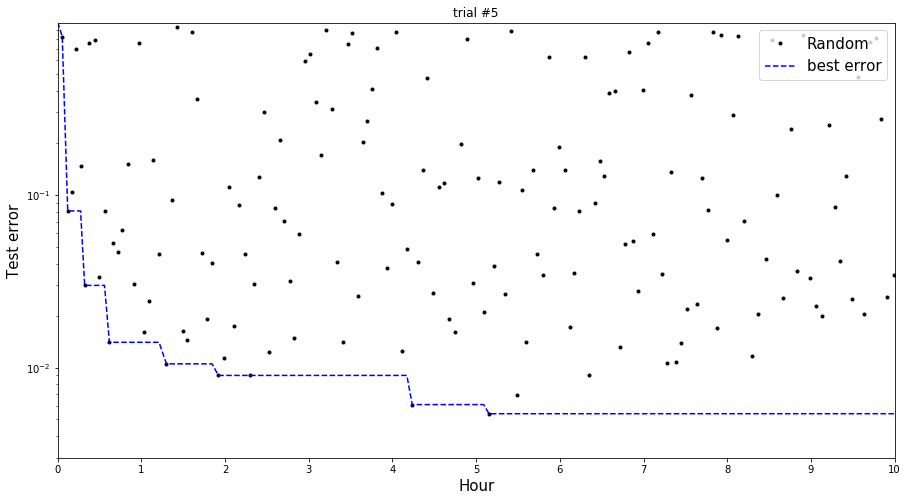

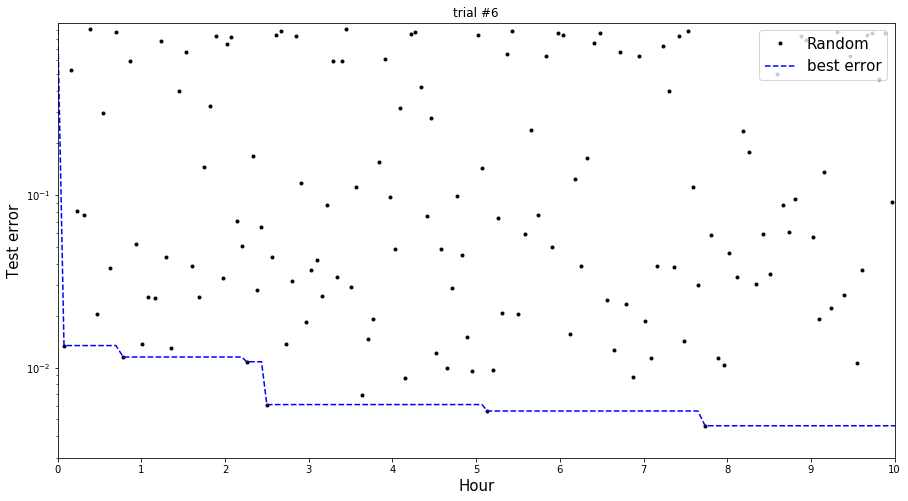

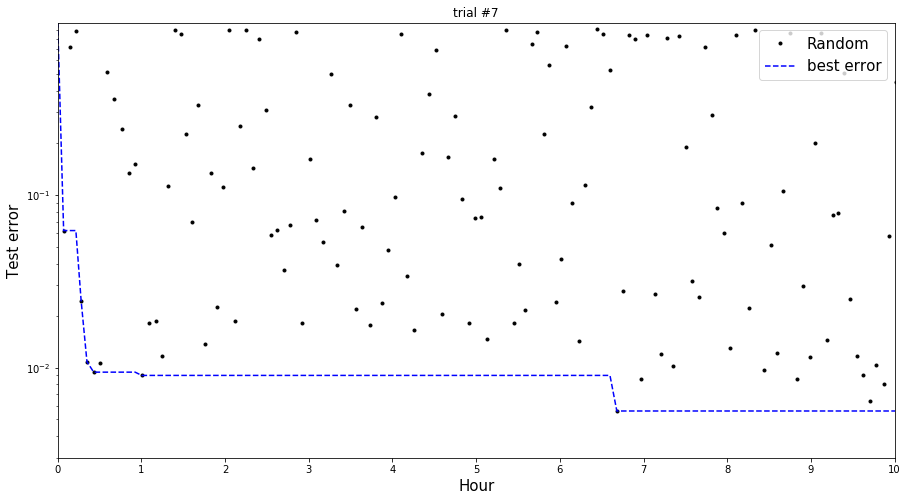

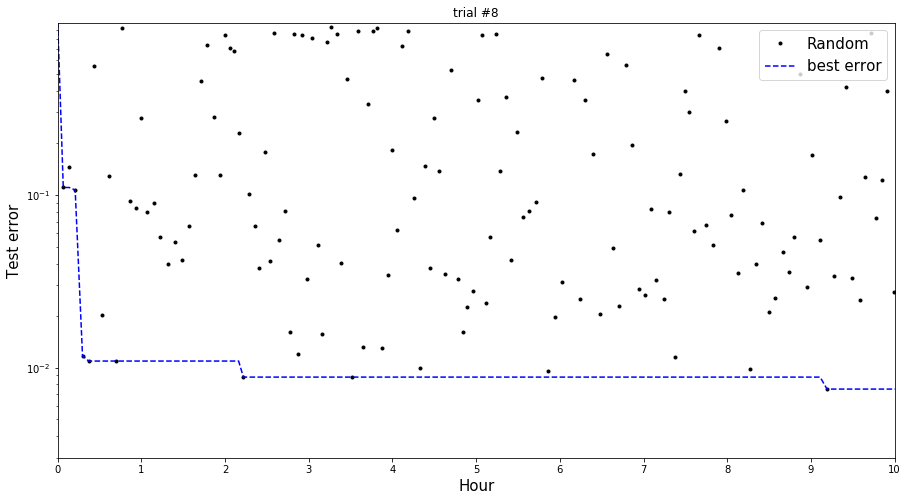

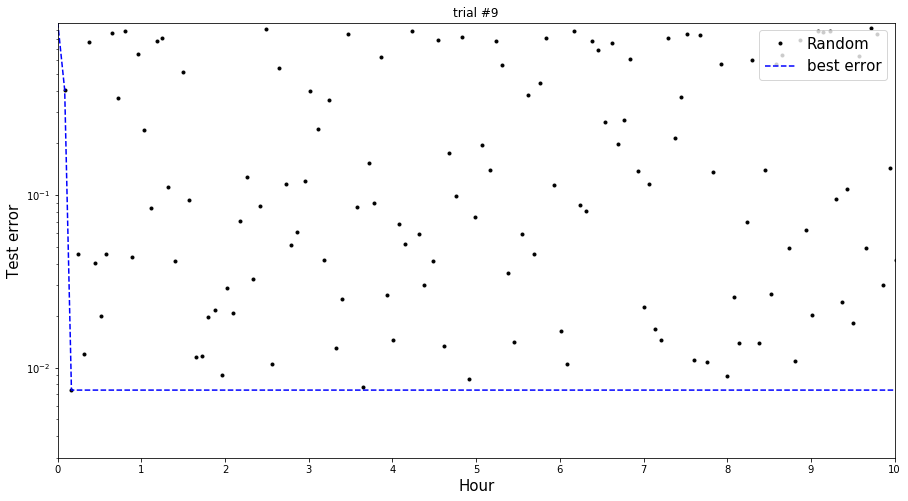

In [70]:
for i in range(nt):
    draw_trials_curve(ep81_results, cfg, i, ylim=(.003, .99), xlim=(0, 10), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

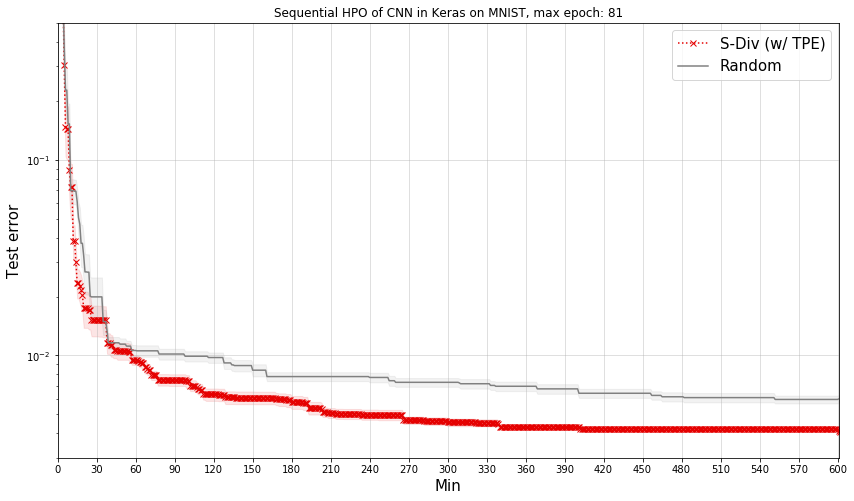

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [71]:
draw_best_error_curve(ep81_results, ['S-Div (w/ TPE)', 'Random'], nt, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}, max epoch: 81".format(benchmark_name))

In [72]:
ep243_results = {}
opt_secs = 72000
s_path = "./{}/T{}S/".format(dataset, opt_secs)


In [74]:
cfg = 'S-Div (w/ TPE)'
ep243_results[cfg] = load_json(s_path + 'DIV-SEQ.p7div-etr.HPO_runner.ETR-DecaTercet(2)' + '.json')

nt = 2
max_accs = []
for i in range(nt):
    max_acc = max(ep243_results[cfg][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("{}\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(cfg, np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))

S-Div (w/ TPE)
avg. 0.9959 (0.0000)
max 0.9959
[0.9959, 0.9959]


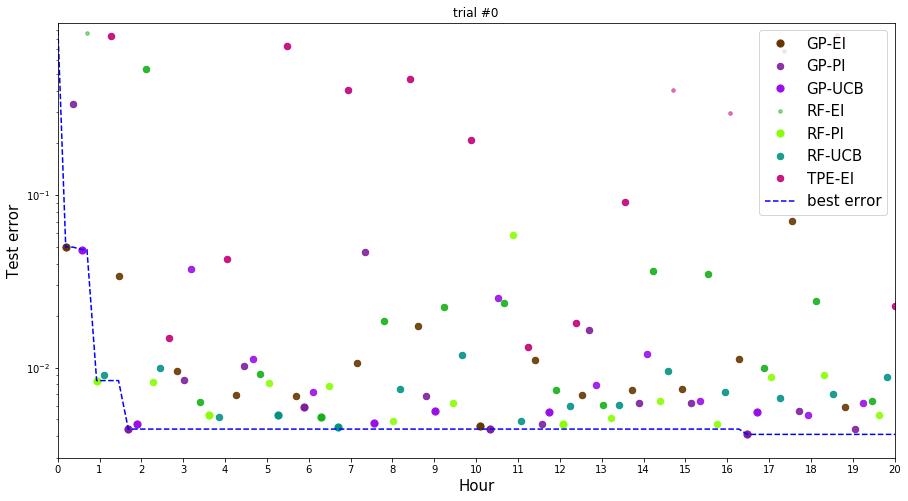

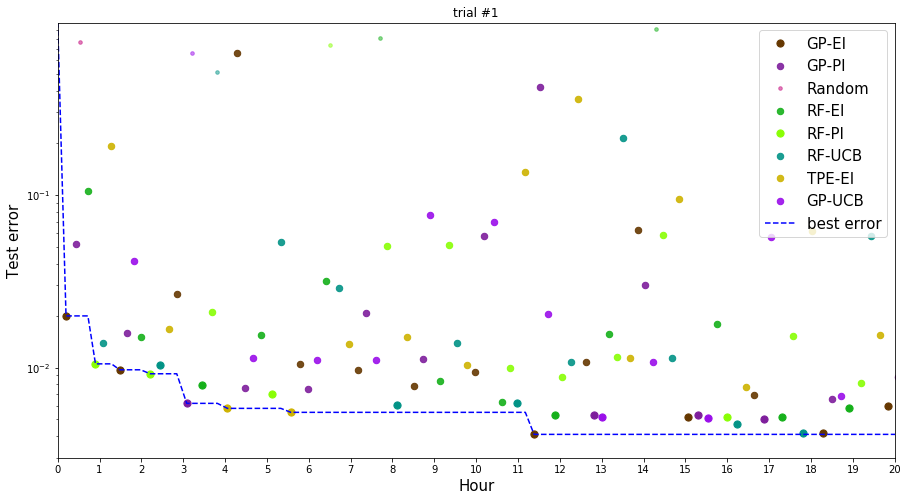

In [76]:
for i in range(nt):
    draw_trials_curve(ep243_results, cfg, i, ylim=(.003, .99), xlim=(0, 20), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

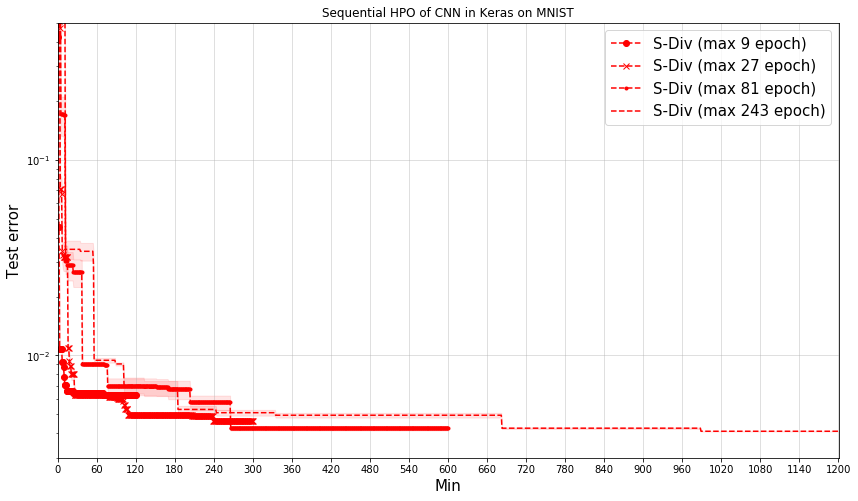

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [90]:
def restyle(name):
    marker = ''
    color ='red'
    line_style = '--'
    
    if 'max 243' in name:
        marker = ''
    elif 'max 81 epoch' in name:
        marker = '.'
    elif 'max 27' in name:
        marker = 'x'
    elif "max 9" in name:
        marker = 'o'
    
    return marker, color, line_style

per_max_epochs = {}
per_max_epochs['S-Div (max 9 epoch)'] = run40_results['S-Div(w/ TPE)']
per_max_epochs['S-Div (max 27 epoch)'] = e27_results['S-Div (w/TPE)']
per_max_epochs['S-Div (max 81 epoch)'] = ep81_results['S-Div (w/ TPE)']
per_max_epochs['S-Div (max 243 epoch)'] = ep243_results['S-Div (w/ TPE)']

draw_best_error_curve(per_max_epochs, list(per_max_epochs.keys()), nt, ylim=(.003, .5), xlim=(0, 60*20+1), style_format=restyle, 
                      summary=True, x_steps=60, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [32]:
max_accs = []
bad_exps = []
soso_exps = []
good_exps = []
for i in range(100):
    max_acc = max(bohb_results['BOHB'][str(i)]['accuracy'])
    if max_acc < 0.9:
        bad_exps.append(i)
    elif max_acc >= 0.99:
        good_exps.append(i)
    else:
        soso_exps.append(i)
    max_accs.append(max_acc)
print("BOHB avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
print("bad (< 0.9) experiments #{}: {}".format(len(bad_exps), bad_exps))
print("good (>=0.99) experiments #{}: {}".format(len(good_exps), good_exps))
bohb_bests = max_accs

BOHB avg. 0.8687 (0.2276)
[0.6943, 0.8812, 0.973, 0.9808, 0.8498, 0.9889, 0.308, 0.9913, 0.9897, 0.9889, 0.5573, 0.4895, 0.973, 0.9868, 0.9865, 0.9901, 0.8165, 0.9901, 0.9879, 0.6436, 0.1524, 0.9702, 0.1135, 0.9133, 0.9809, 0.5749, 0.896, 0.9681, 0.9877, 0.9947, 0.9812, 0.9859, 0.6734, 0.9908, 0.9893, 0.9917, 0.9687, 0.9928, 0.9882, 0.959, 0.9692, 0.9892, 0.5025, 0.6146, 0.9696, 0.687, 0.9875, 0.9889, 0.9128, 0.9701, 0.9595, 0.9825, 0.9703, 0.9878, 0.6019, 0.9815, 0.7534, 0.9156, 0.9713, 0.7707, 0.9827, 0.9816, 0.1135, 0.9931, 0.9785, 0.9858, 0.9904, 0.9105, 0.9766, 0.9776, 0.9655, 0.9636, 0.9829, 0.9553, 0.9952, 0.9908, 0.9701, 0.9909, 0.9723, 0.1135, 0.9822, 0.9594, 0.99, 0.8966, 0.4981, 0.3504, 0.9553, 0.9861, 0.9937, 0.9713, 0.1135, 0.98, 0.9898, 0.9816, 0.9614, 0.93, 0.98, 0.9732, 0.9826, 0.9763]
bad (< 0.9) experiments #25: [0, 1, 4, 6, 10, 11, 16, 19, 20, 22, 25, 26, 32, 42, 43, 45, 54, 56, 59, 62, 79, 83, 84, 85, 90]
good (>=0.99) experiments #14: [7, 15, 17, 29, 33, 35, 37, 63

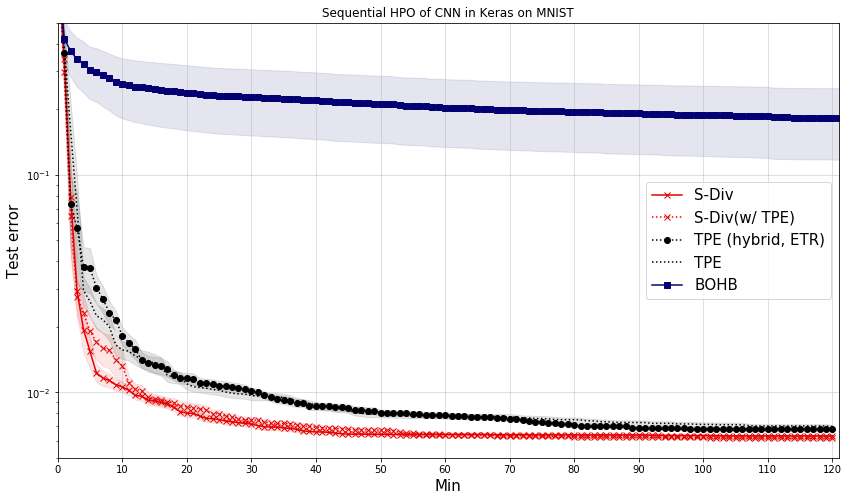

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [33]:
run30_results['BOHB'] = bohb_results['BOHB']
draw_best_error_curve(run30_results, ["S-Div", 'S-Div(w/ TPE)' ] + ['TPE (hybrid, ETR)', 'TPE', 'BOHB'], 30, ylim=(.005, .5), xlim=(0, 120+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

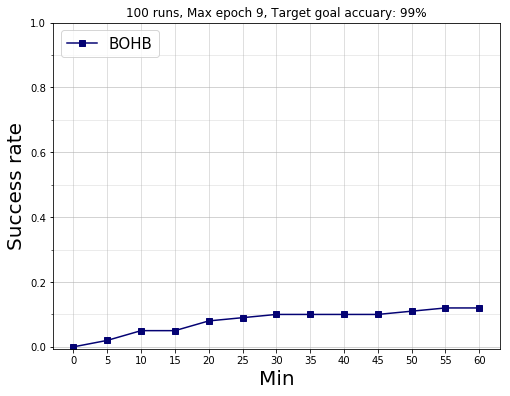

In [34]:
draw_success_rate_fig(bohb_results, 0.99, 60 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=100,
                                              div=[ 'BOHB'],  legend={'loc': 2}, title='100 runs, Max epoch 9, Target goal accuary: 99%',
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

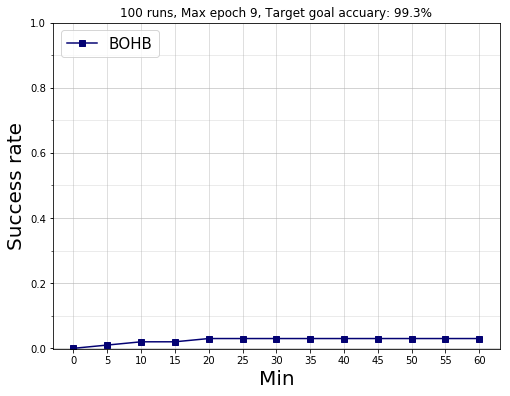

In [35]:
draw_success_rate_fig(bohb_results, 0.993, 60 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=100,
                                              div=[ 'BOHB'],  legend={'loc': 2}, title='100 runs, Max epoch 9, Target goal accuary: 99.3%',
                                                 width=8, height=6)

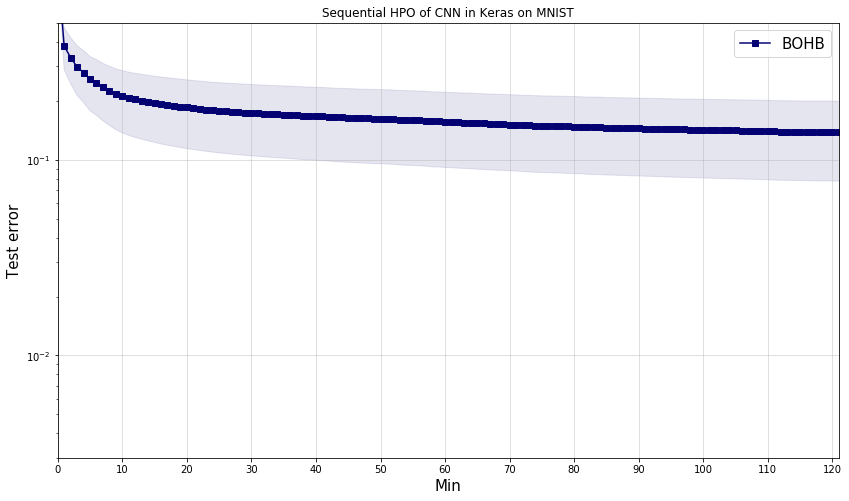

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [36]:
draw_best_error_curve(bohb_results, ["BOHB"], 100, ylim=(.003, .5), xlim=(0, 60*2+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

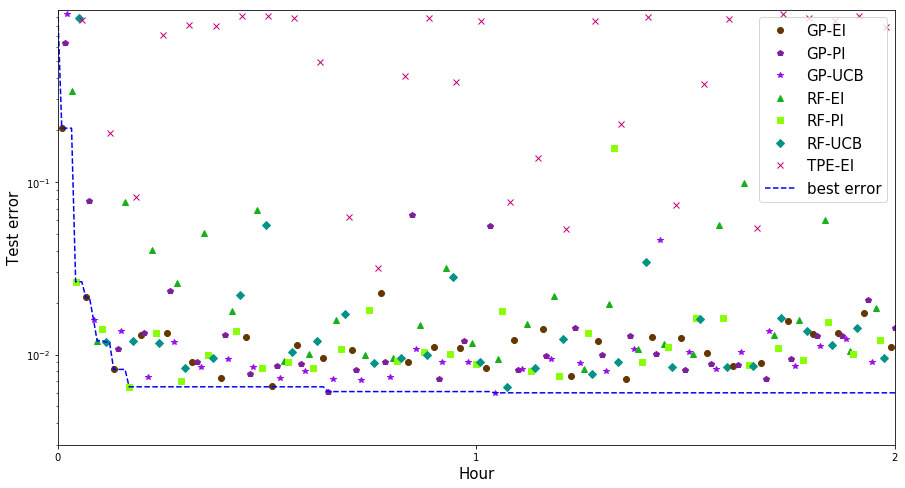

In [37]:
draw_trials_curve(run30_results, 'S-Div(w/ TPE)', 8, ylim=(.003, .99), xlim=(0, 2), 
                  width=15, height=8, loc=1 )

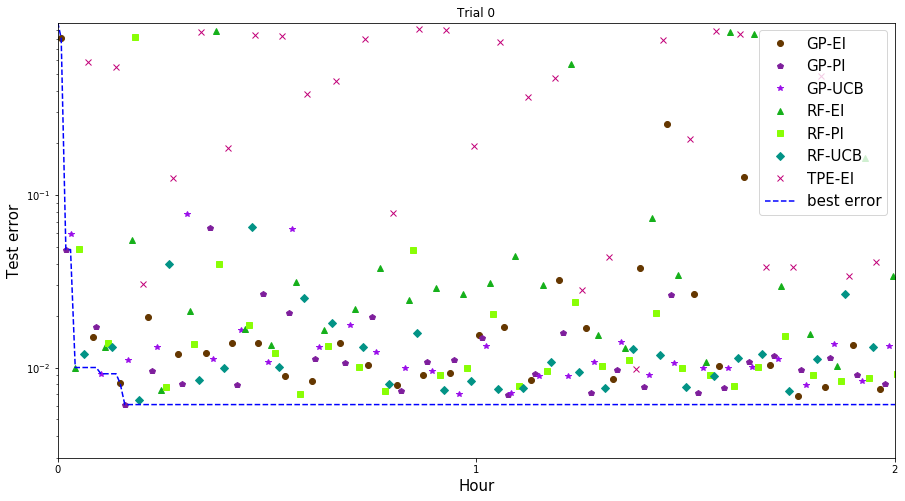

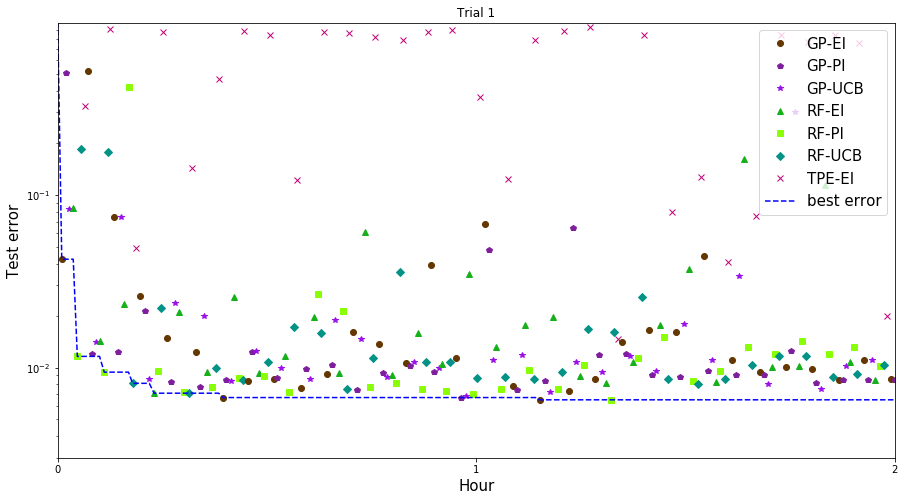

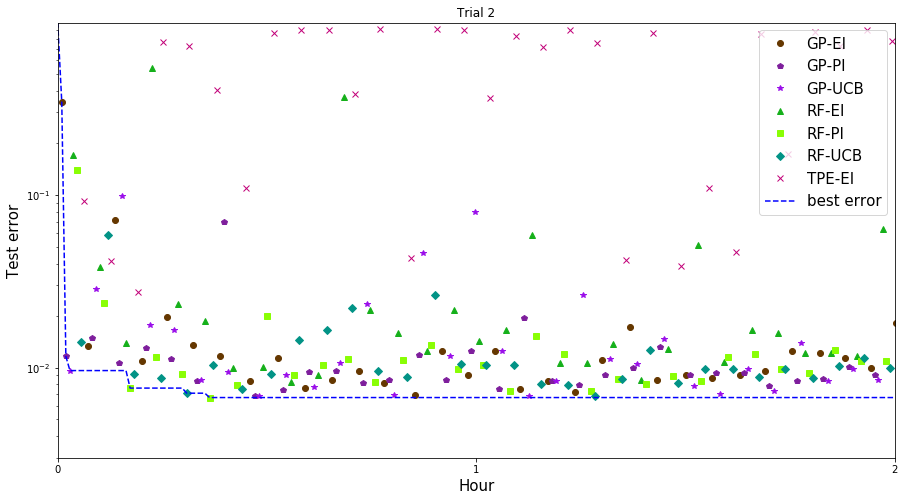

In [38]:
for i in range(3):
    draw_trials_curve(run40_results, 'S-Div(w/ TPE)', i, ylim=(.003, .99), xlim=(0, 2), title="Trial {}".format(i),
                  width=15, height=8, loc=1 )

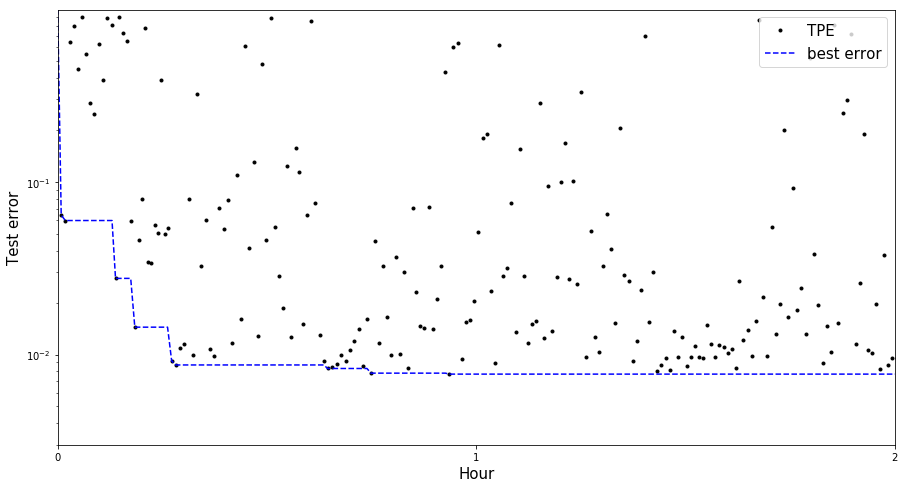

In [39]:
draw_trials_curve(run30_results, 'TPE', 1, ylim=(.003, .99), xlim=(0, 2), 
                  width=15, height=8, loc=1)

for i in good_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.003, .99), xlim=(0, 2),  title='Good experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in bad_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.1, .99), xlim=(0, 2),  title='Bad experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in soso_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.009, .5), xlim=(0, 2),  title='Fairly good experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in range(10):
    draw_trials_curve(run10_results, 'Random (Sobol)', i, ylim=(.005, .5), xlim=(0, 2),  title='Random selection: trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in range(10):
    draw_trials_curve(run10_results, 'Random (Sobol, ETR)', i, ylim=(.005, .5), xlim=(0, 2),  title='Random selection: trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in range(10):
    draw_trials_curve(run10_results, 'Random (HyperOpt)', i, ylim=(.005, .5), xlim=(0, 2),  title='Random selection: trial {}'.format(i),
                      width=15, height=8, loc=1 )

for i in range(10):
    draw_trials_curve(run10_results, 'Random (HyperOpt, ETR)', i, ylim=(.005, .5), xlim=(0, 2),  title='Random selection: trial {}'.format(i),
                      width=15, height=8, loc=1 )